In [68]:
#Importing imp libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [69]:
#Reading dataset
df = pd.read_csv(r'D:\VS code files\building_energy_consumption\dataset\singapore_dataset\end_end\data\building-energy-performance-data-for-2022.csv')
df.head()

,Building Type,Main Function,Building Size,2020 EUI,2020 EUI Quartile/ Energy Ranking,2021 EUI,2021 EUI Quartile/ Energy Ranking,2022 EUI,2022 EUI Quartile/ Energy Ranking,TOP/CSC Year,Award (Green/Non-Green),Green Mark Version,GFA,AC Area,AC Area Percentage,No. Of Hotel Room,AC Type,Age of Chiller,Air-con system efficiency (kW/RT)
0,Commercial Building,Industrial,Large,3725.0,NaN,4453,NaN,4580,NaN,2015,Platinum,Existing Data Centres,"35,218","28,536",81%,0,Water Cooled Chilled Water Plant,7.0,0.744
1,Commercial Building,Industrial,Large,2044.0,Bottom Quartile,2214,Bottom Quartile,2305,Bottom Quartile,1999,NaN,NaN,"38,349","20,000",52%,0,Water Cooled Chilled Water Plant,20.0,0.000
2,Commercial Building,Industrial,Large,1157.0,Bottom Quartile,1182,Bottom Quartile,1151,Bottom Quartile,2014,Platinum,New Building for Non-Residential buildings (ve...,"19,173","19,173",100%,0,Water Cooled Chilled Water Plant,5.0,0.578
3,Commercial Building,Office,Large,553.0,Bottom Quartile,661,Bottom Quartile,805,Bottom Quartile,1986,NaN,NaN,"15,819","12,724",80%,0,Water Cooled Chilled Water Plant,0.0,0.000
4,Commercial Building,Industrial,Large,713.0,Bottom Quartile,712,Bottom Quartile,724,Bottom Quartile,1995,GoldPlus,Existing Building for Non-Residential building...,"30,469","22,476",74%,0,Water Cooled Chilled Water Plant,8.0,0.582


In [70]:
df.drop(columns=['AC Area Percentage'],inplace=True,axis=1)

In [71]:
#Data Shape
print("**"*30)
print(f"Shape of the data are as follow {df.shape[0]} rows & {df.shape[1]} Columns")
print("**"*30)

************************************************************
Shape of the data are as follow 1498 rows & 18 Columns
************************************************************


In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2020 EUI,1498.0,213.638531,211.811931,0.00,111.1075,172.39,256.905,3725.0
2021 EUI,1498.0,129.025367,219.287172,0.00,0.0000,82.00,190.000,4453.0
2022 EUI,1498.0,133.268358,225.331443,0.00,0.0000,86.50,197.000,4580.0
TOP/CSC Year,1498.0,1997.638852,54.206560,0.00,1990.0000,2000.00,2011.750,2024.0
No. Of Hotel Room,1498.0,31.411215,138.443298,0.00,0.0000,0.00,0.000,2561.0
Age of Chiller,1498.0,5.692056,6.744702,0.00,0.0000,4.00,9.000,53.0
Air-con system efficiency (kW/RT),1498.0,17.579817,633.650741,-3.32,0.0000,0.00,0.000,24506.0


In [73]:
df.describe(include='object')

,Building Type,Main Function,Building Size,2020 EUI Quartile/ Energy Ranking,2021 EUI Quartile/ Energy Ranking,2022 EUI Quartile/ Energy Ranking,Award (Green/Non-Green),Green Mark Version,GFA,AC Area,AC Type
count,1498,1498,1078,588,594,597,800,778,1498,1498,934
unique,5,17,4,4,4,4,6,20,1161,834,5
top,Commercial Building,Office,Large,Top Quartile,Top Quartile,2nd Quartile,Platinum,Existing Building for Non-Residential building...,"6,359",0,Water Cooled Chilled Water Plant
freq,1256,707,615,153,169,197,314,293,4,577,488


In [74]:
df.isnull().sum()

Building Type                          0
Main Function                          0
Building Size                        420
2020 EUI                               0
2020 EUI Quartile/ Energy Ranking    910
2021 EUI                               0
2021 EUI Quartile/ Energy Ranking    904
2022 EUI                               0
2022 EUI Quartile/ Energy Ranking    901
TOP/CSC Year                           0
Award (Green/Non-Green)              698
Green Mark Version                   720
GFA                                    0
AC Area                                0
No. Of Hotel Room                      0
AC Type                              564
Age  of Chiller                        0
Air-con system efficiency (kW/RT)      0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Building Type                      1498 non-null   object 
 1   Main Function                      1498 non-null   object 
 2   Building Size                      1078 non-null   object 
 3   2020 EUI                           1498 non-null   float64
 4   2020 EUI Quartile/ Energy Ranking  588 non-null    object 
 5   2021 EUI                           1498 non-null   int64  
 6   2021 EUI Quartile/ Energy Ranking  594 non-null    object 
 7   2022 EUI                           1498 non-null   int64  
 8   2022 EUI Quartile/ Energy Ranking  597 non-null    object 
 9   TOP/CSC Year                       1498 non-null   int64  
 10  Award (Green/Non-Green)            800 non-null    object 
 11  Green Mark Version                 778 non-null    objec

In [76]:
columns_to_remove_comma = ['GFA','AC Area']

for col in columns_to_remove_comma:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

In [77]:
df['GFA'] = df['GFA'].astype(float)

In [78]:
#Make two empty list for numeric and object data
#save numeric data into num empty list
num= []
cat = []

#iterate through dataset and save different dtypes in different list
for col in df.columns:

    #take help of api to save numeric data into an empty list
    if pd.api.types.is_numeric_dtype(df[col]):
        num.append(col)
    else:
        cat.append(col)

#Print empty list
print(num)
print(cat)

['2020 EUI', '2021 EUI', '2022 EUI', 'TOP/CSC Year', 'GFA', 'AC Area', 'No. Of Hotel Room', 'Age  of Chiller', 'Air-con system efficiency (kW/RT)']
['Building Type', 'Main Function', 'Building Size', '2020 EUI Quartile/ Energy Ranking', '2021 EUI Quartile/ Energy Ranking', '2022 EUI Quartile/ Energy Ranking', 'Award (Green/Non-Green)', 'Green Mark Version', 'AC Type']


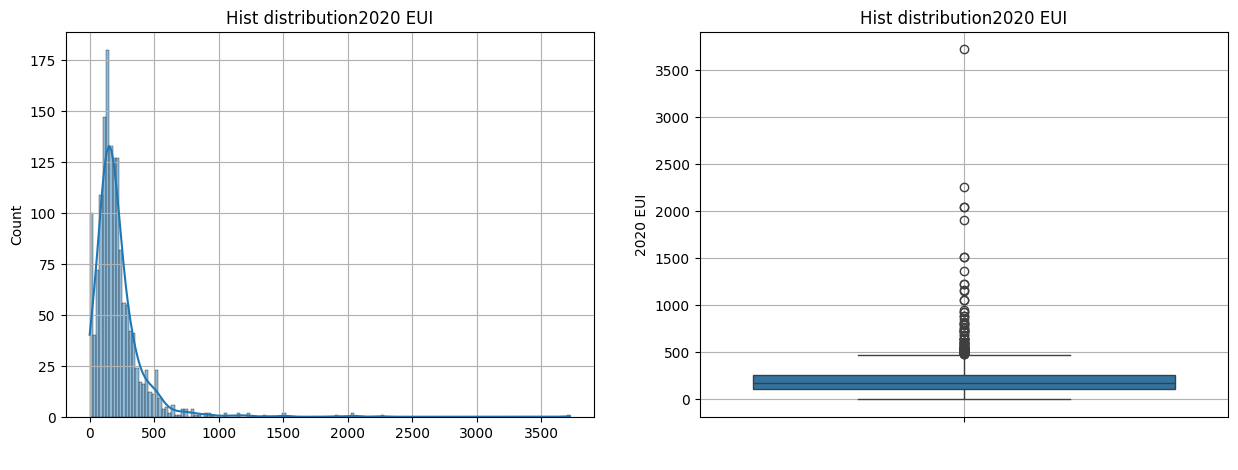

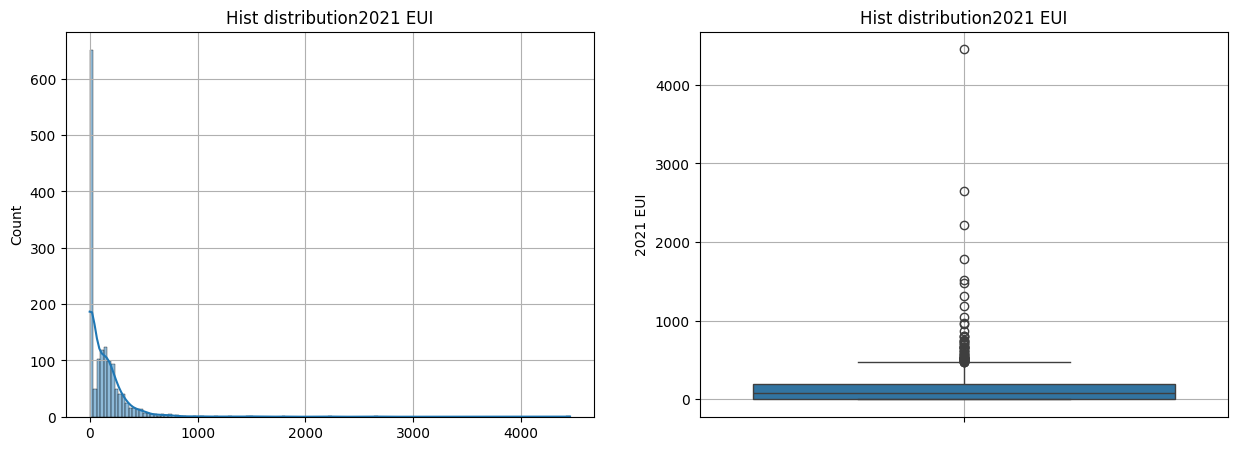

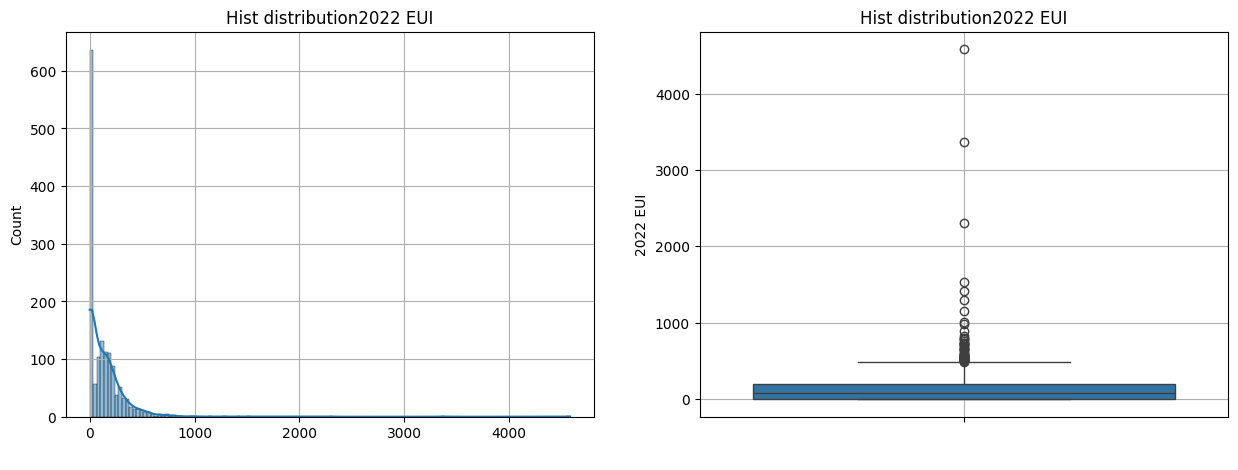

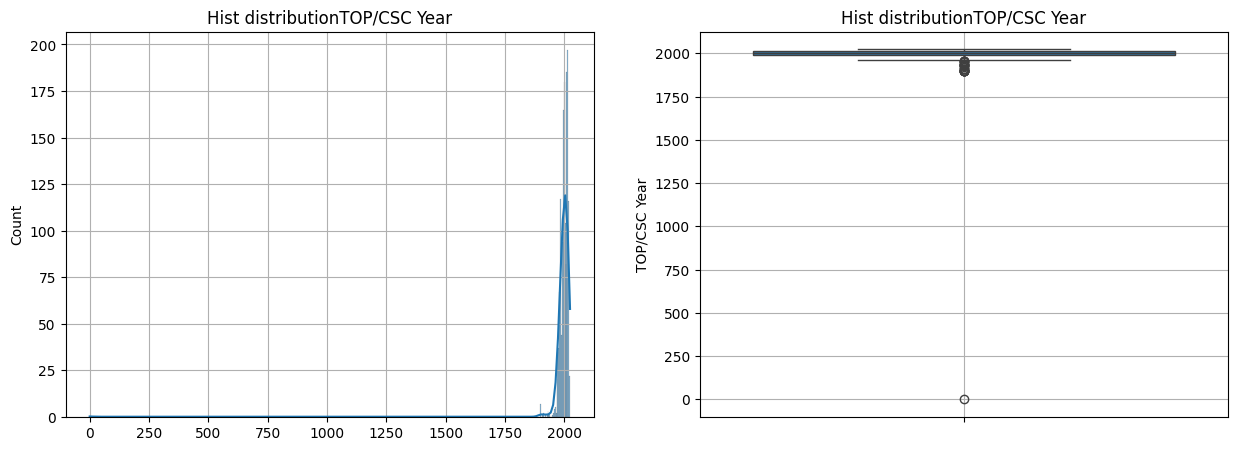

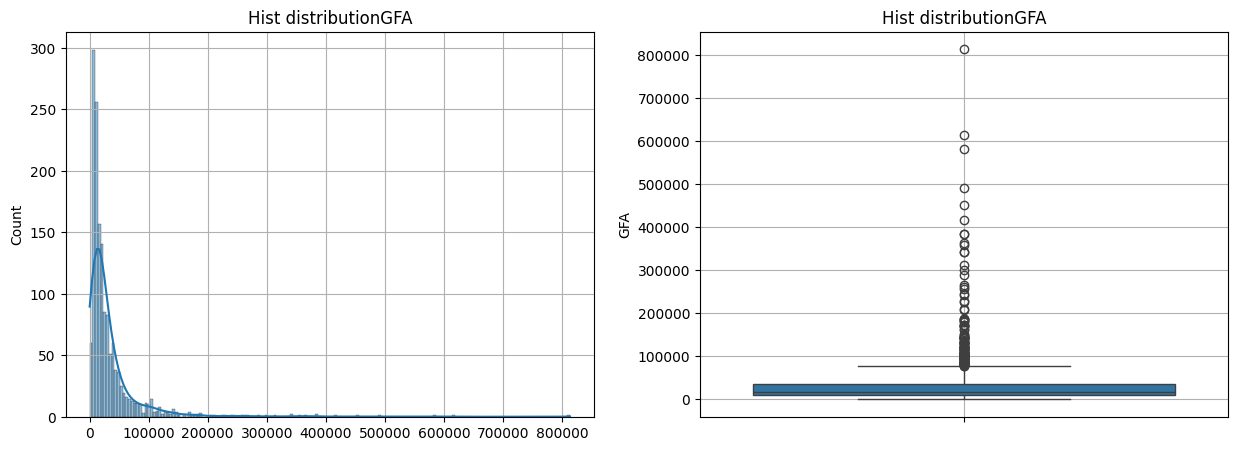

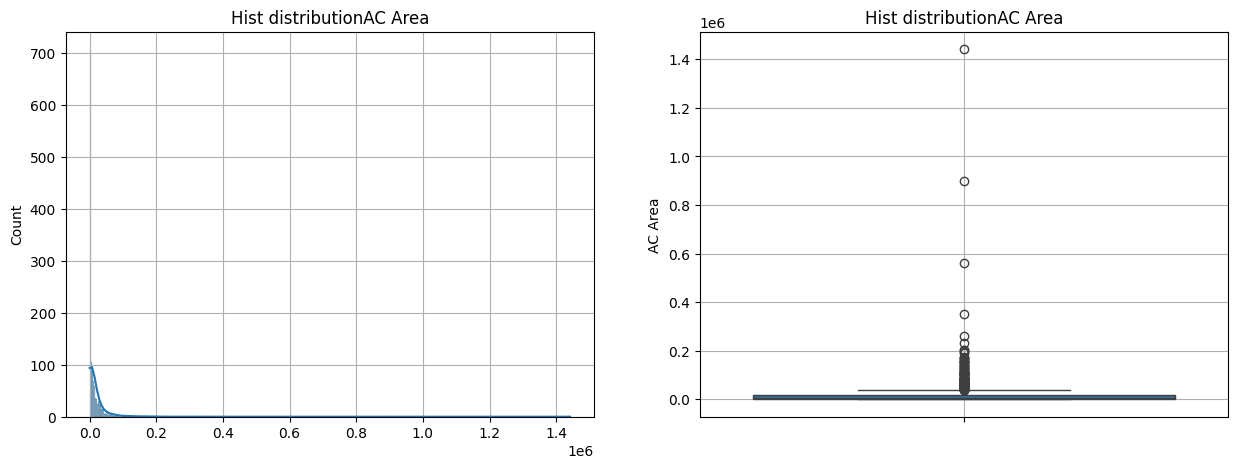

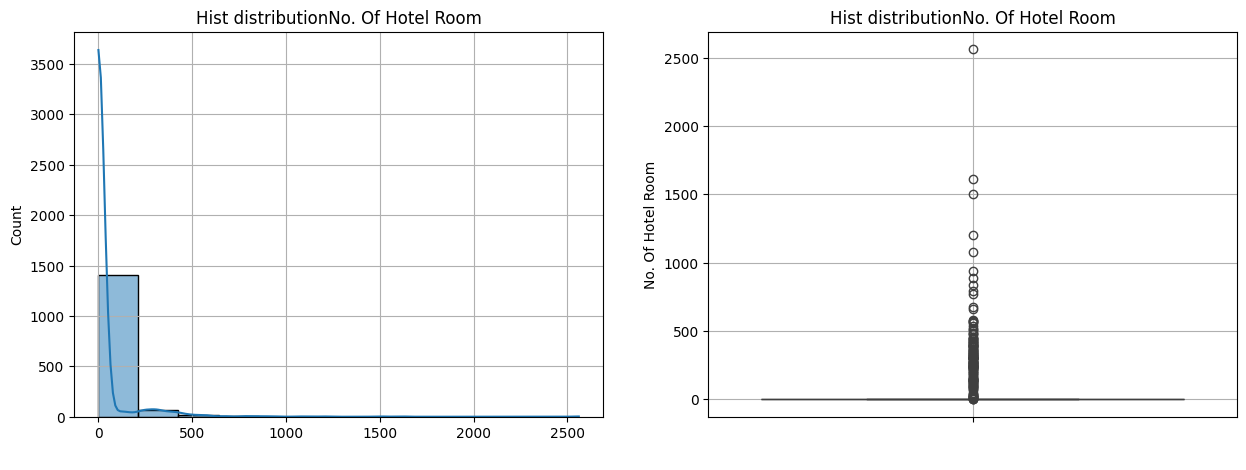

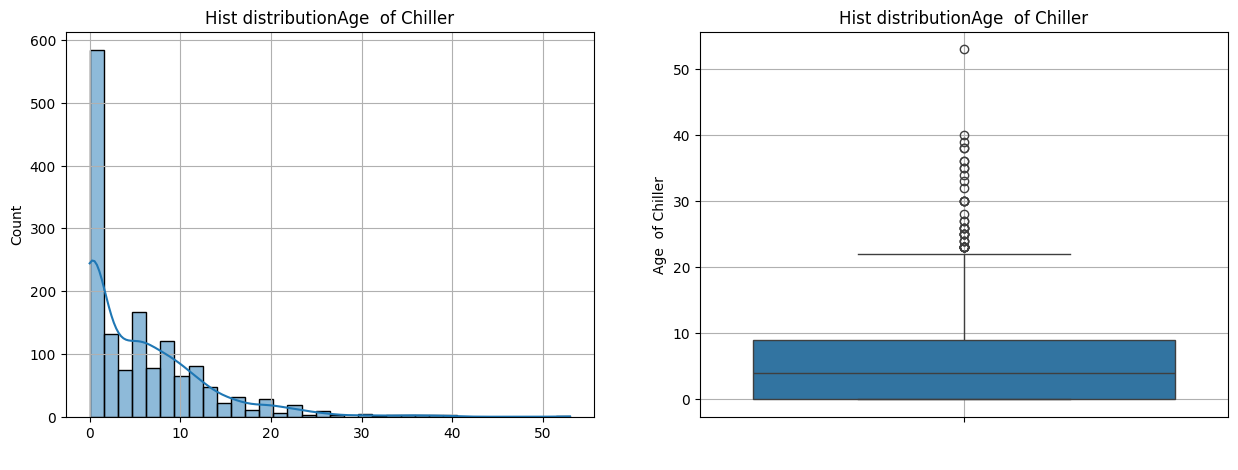

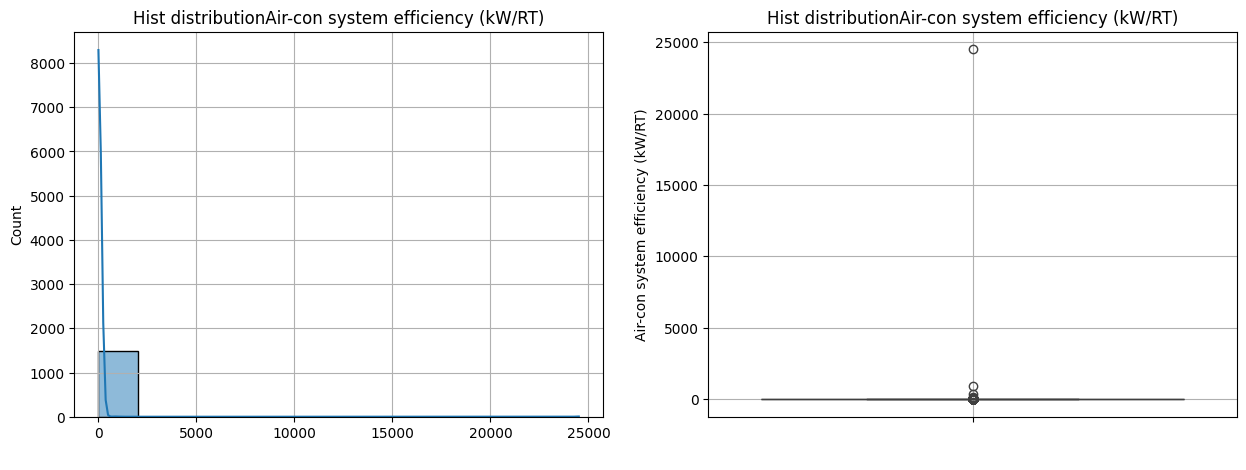

In [79]:
#Multiple plot of numeric columns and 

for i in num:

    #Iterate through all the data values 
    figure,axes = plt.subplots(1,2,figsize=(15,5))
    sns.histplot(df[i],ax=axes[0],kde=True)
    axes[0].set_title(f"Hist distribution{i}")
    axes[0].grid(True)
    axes[0].set_xlabel(" ")

    #box plot
    sns.boxplot(df[i],ax=axes[1])
    axes[1].set_title(f"Hist distribution{i}")
    axes[1].grid(True)
    axes[1].set_xlabel(" ")

<Figure size 2000x600 with 0 Axes>

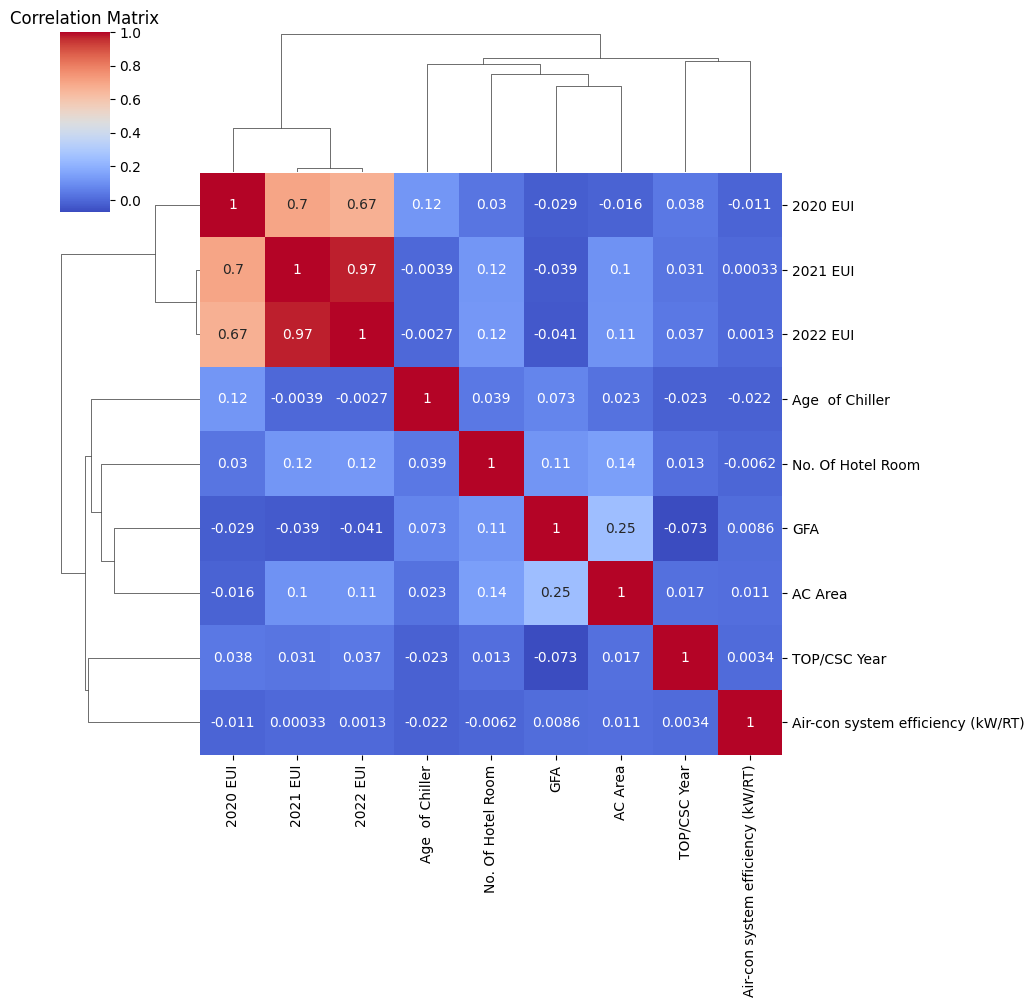

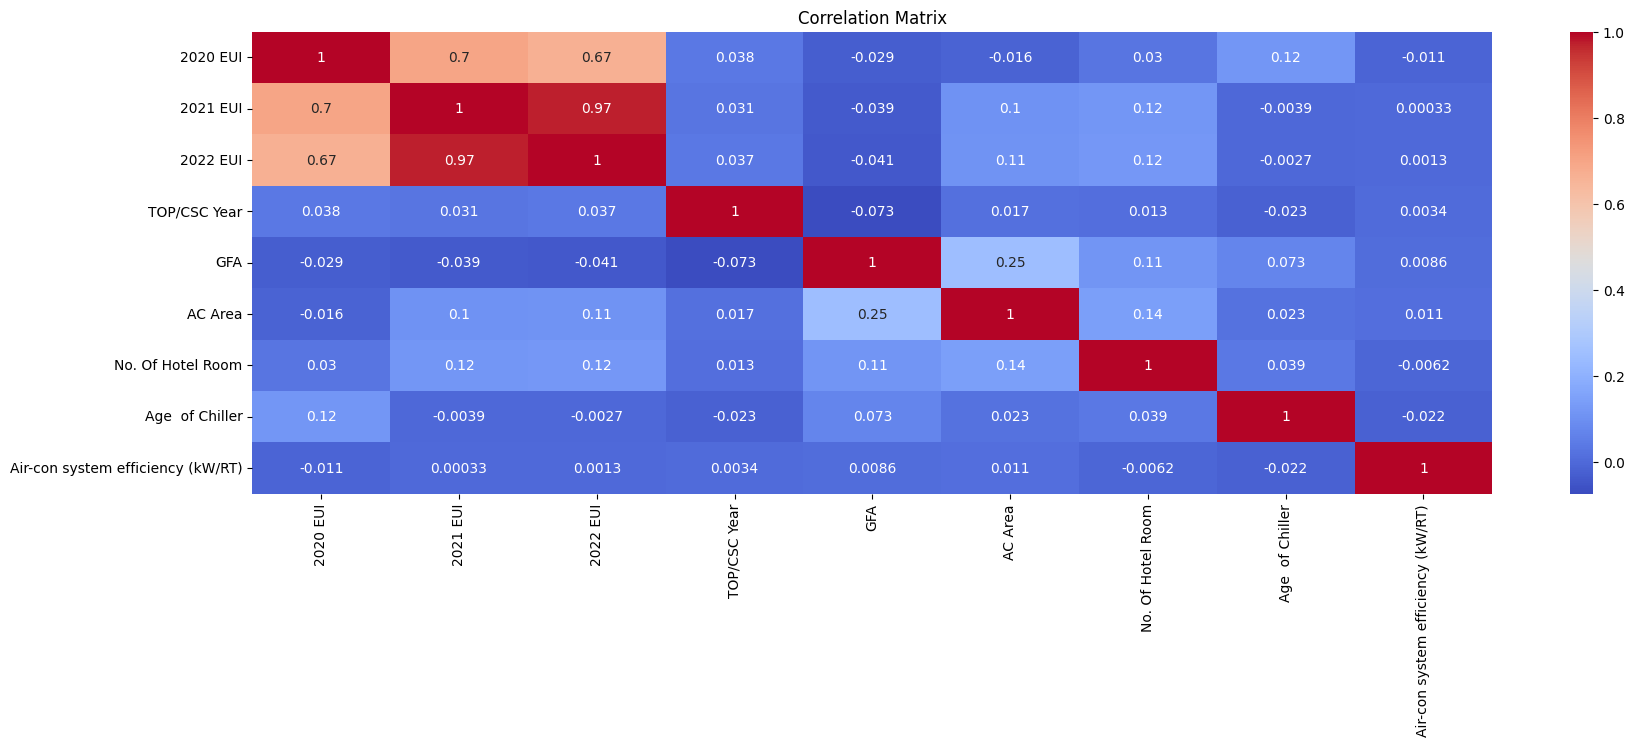

In [80]:
corr = df.select_dtypes(include=['int','float']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 6))
sns.clustermap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


plt.figure(figsize=(20, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## The correlation matrix provides several insights into the relationships between various factors related to energy use intensity (EUI) and hotel characteristics. Here are the key insights:

1. Strong Correlation between EUI Values:
    - There is a strong positive correlation between the EUI values of different years
        - 2020 EUI and 2021 EUI have a correlation of 0.7.
        - 2020 EUI and 2022 EUI have a correlation of 0.67.
        - 2021 EUI and 2022 EUI have a very strong correlation of 0.97.
    - This suggests that the EUI values are consistent over the years, indicating stable energy consumption patterns or similar operational conditions over these years.

2. Weak Correlation with TOP/CSC Year:
    - The TOP/CSC Year shows very weak correlations with EUI values (0.038 with 2020 EUI, 0.031 with 2021 EUI, and 0.037 with 2022 EUI)..
    - This indicates that the year of construction or major renovation does not significantly impact the EUI.

3. Number of Hotel Rooms:
    - The number of hotel rooms has a very weak correlation with EUI values (0.03 with 2020 EUI, 0.12 with 2021 EUI, and 0.12 with 2022 EUI).
    - This suggests that the size of the hotel (in terms of room count) does not have a strong impact on energy usage intensity.

4. Age of Chiller:
    - The age of the chiller shows weak correlations with EUI values (0.12 with 2020 EUI, -0.0039 with 2021 EUI, and -0.0027 with 2022 EUI).
    - This indicates that the age of the chiller has minimal impact on the energy usage intensity.

5. Air-conditioning System Efficiency
    - The efficiency of the air-conditioning system (measured in kW/RT) has almost no correlation with EUI values (-0.011 with 2020 EUI, 0.00033 with 2021 EUI, and 0.0013 with 2022 EUI).
    - This suggests that air-conditioning system efficiency, as measured, does not significantly influence overall energy usage intensity in these hotels

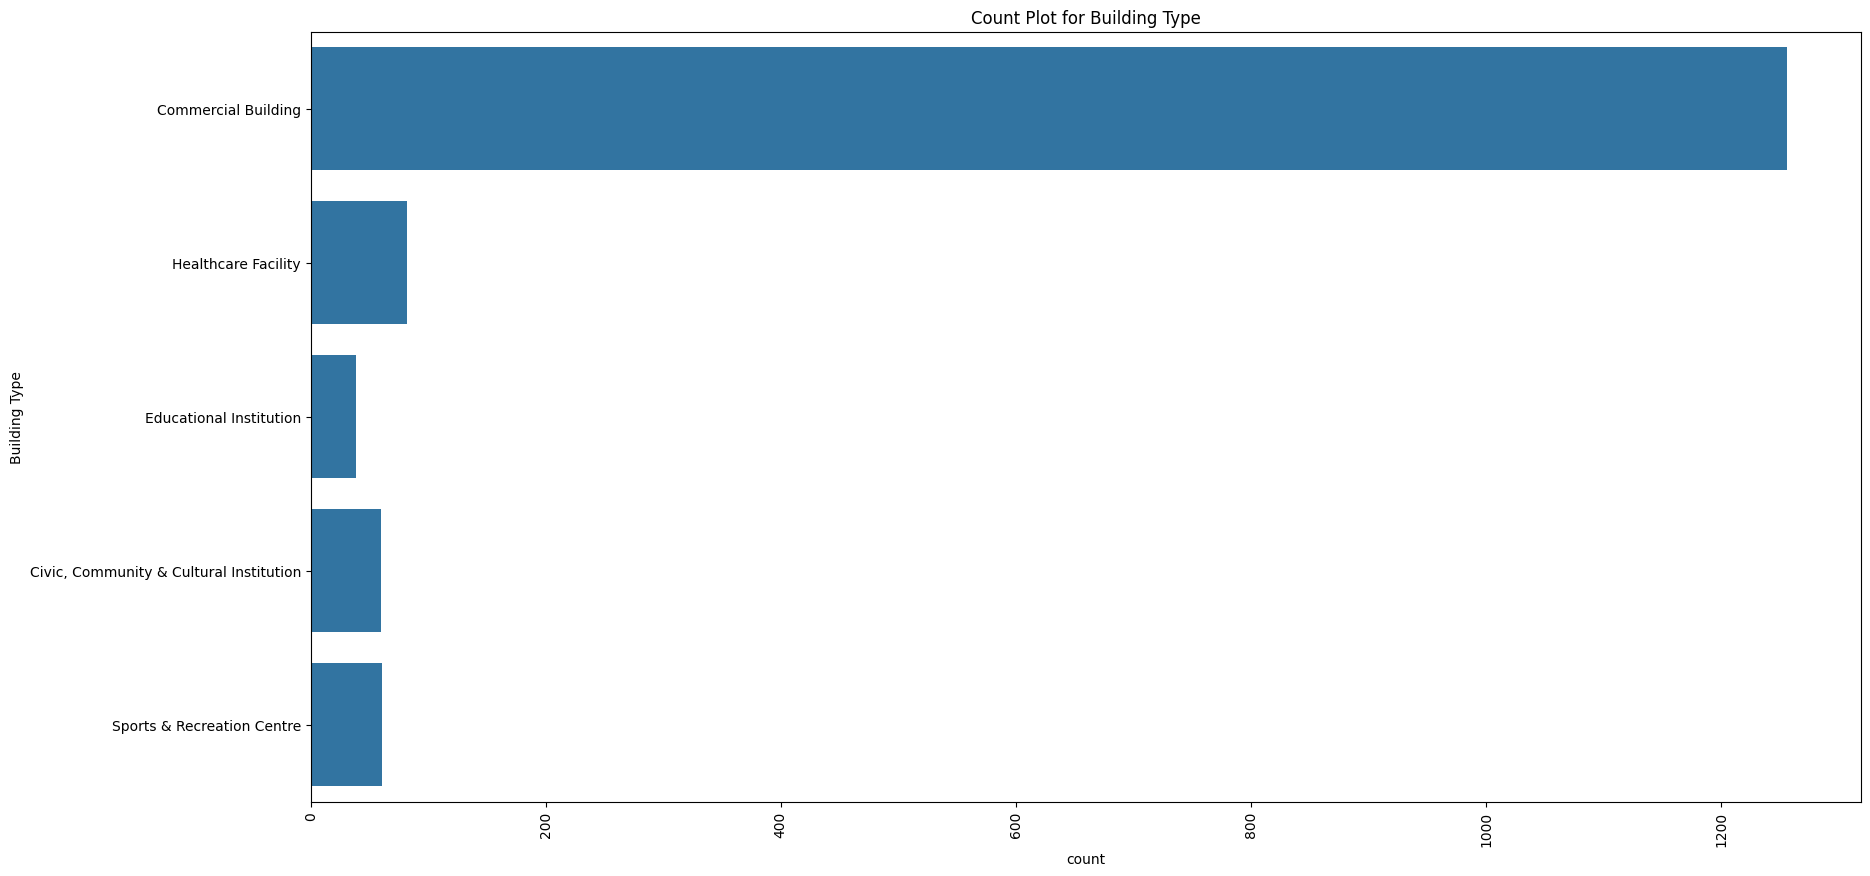

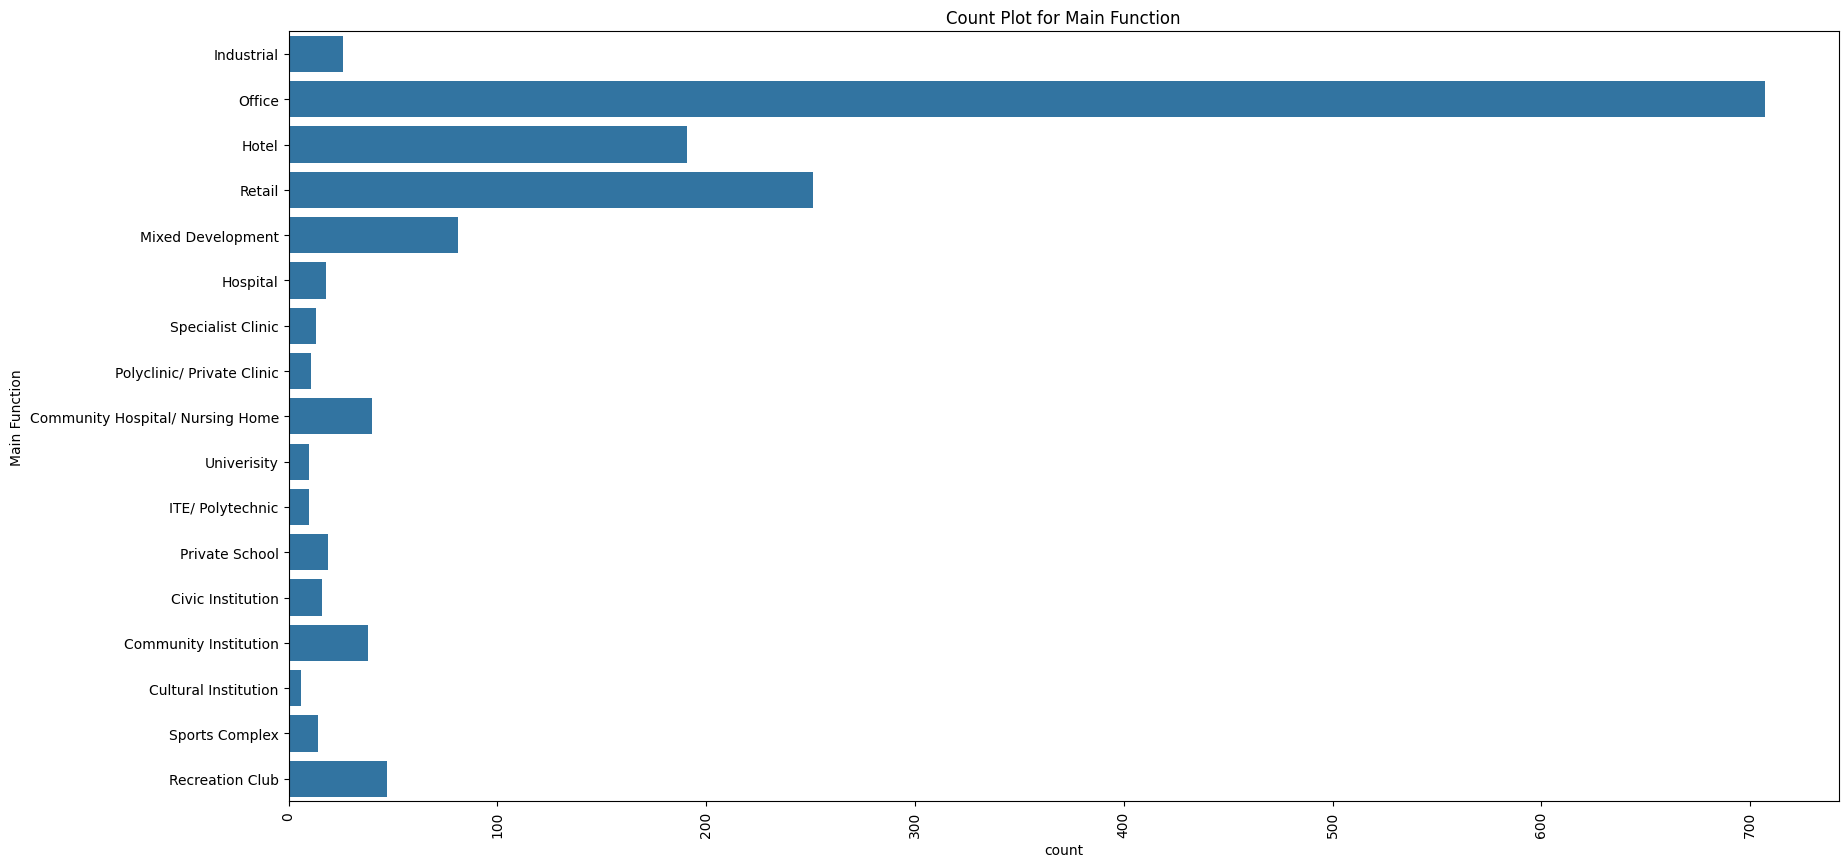

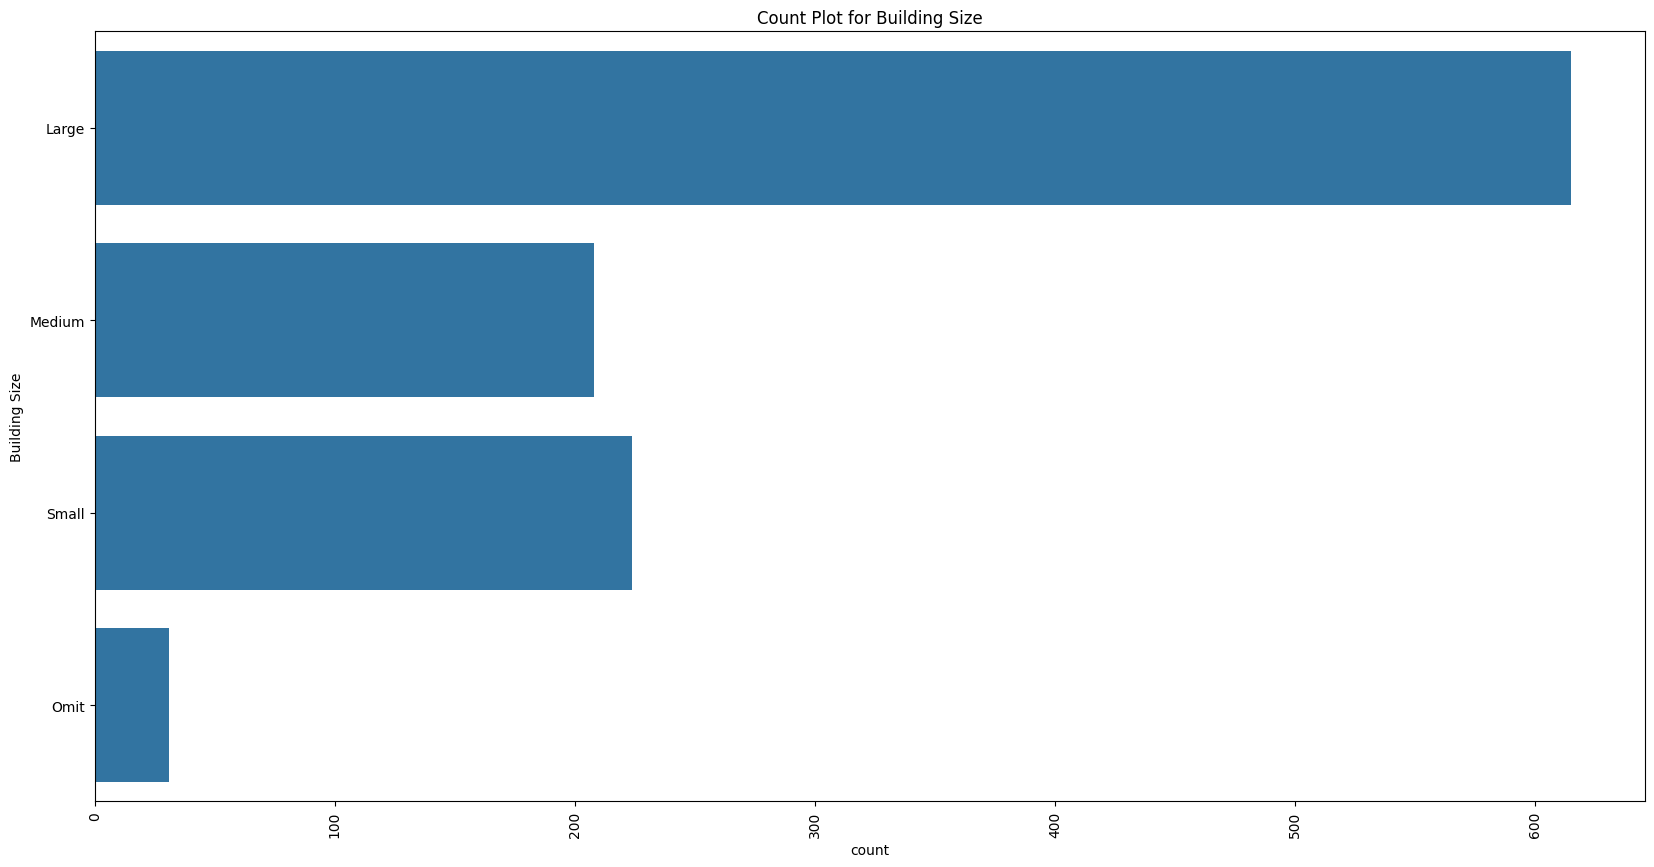

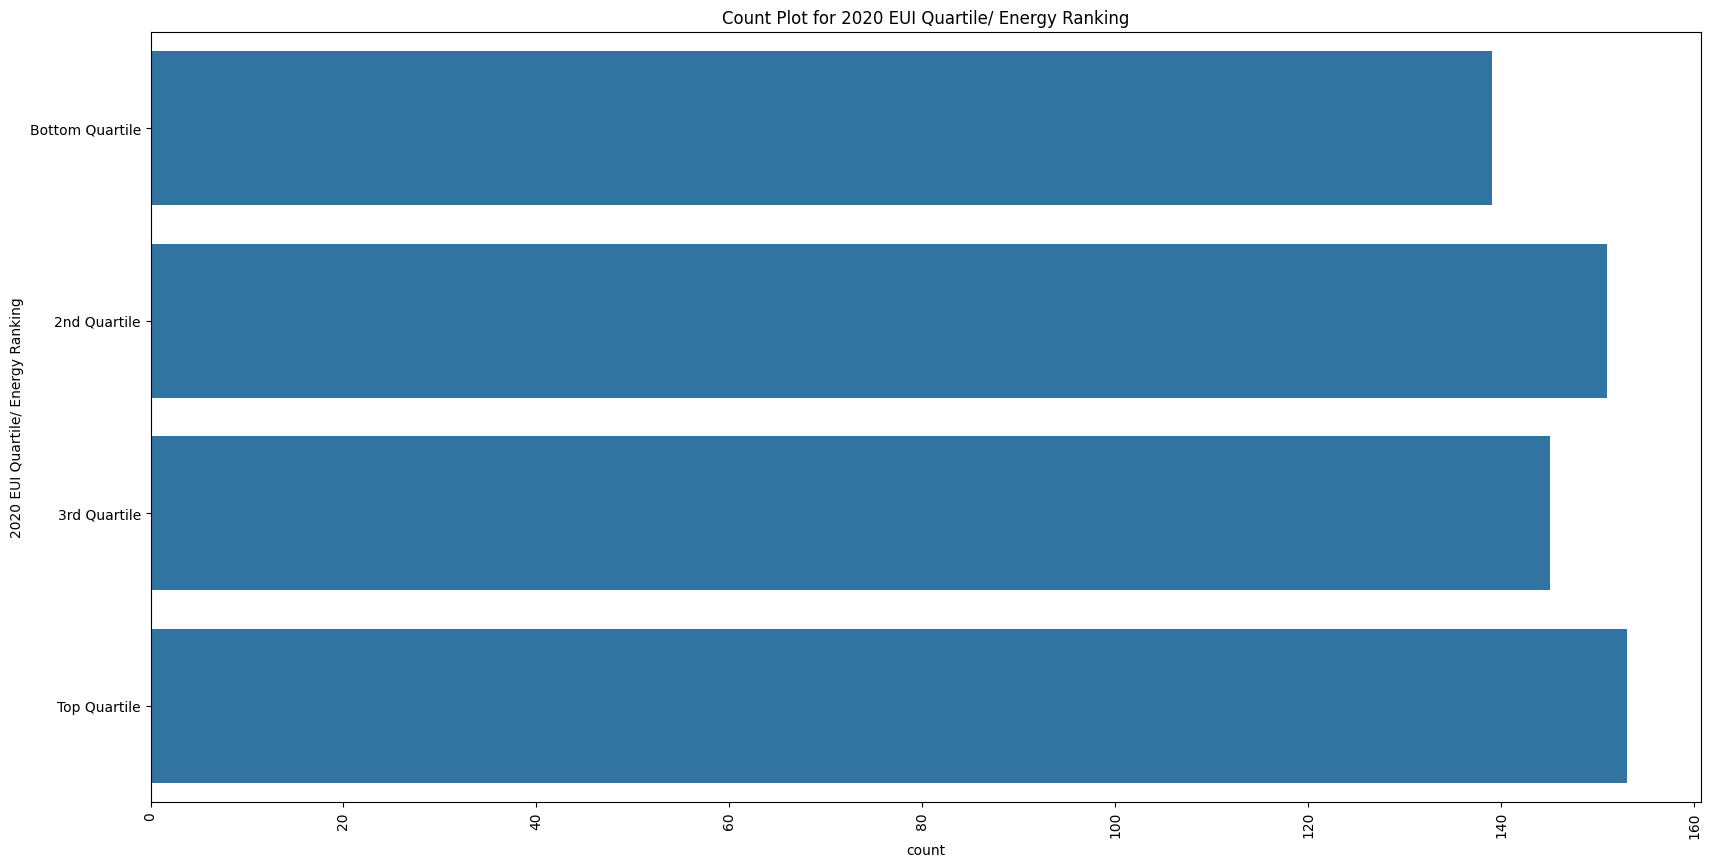

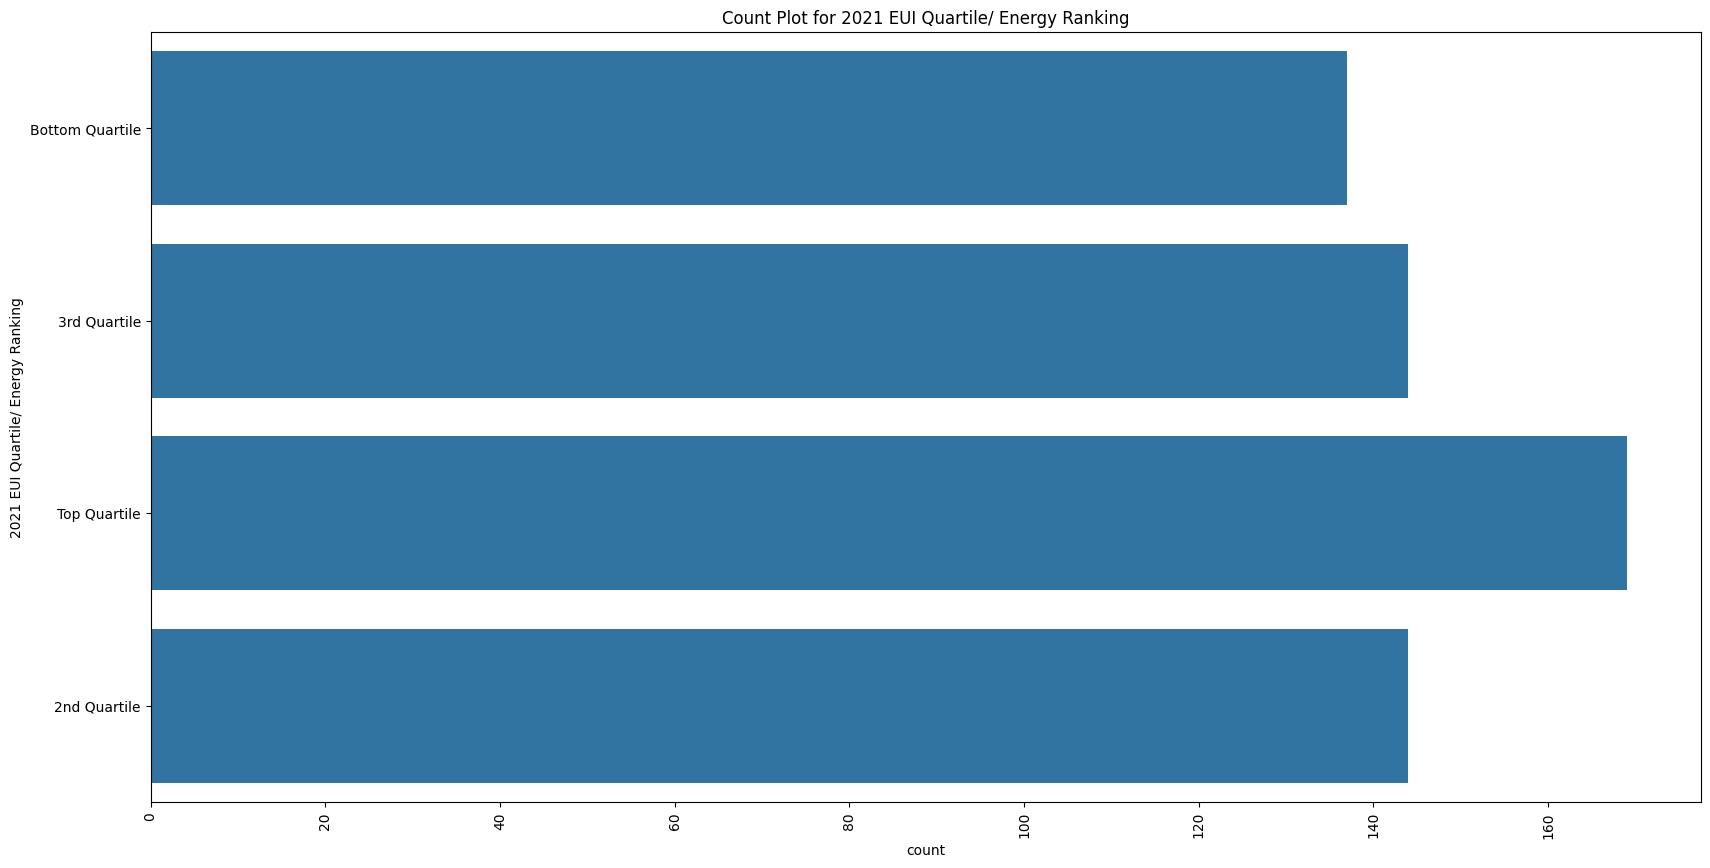

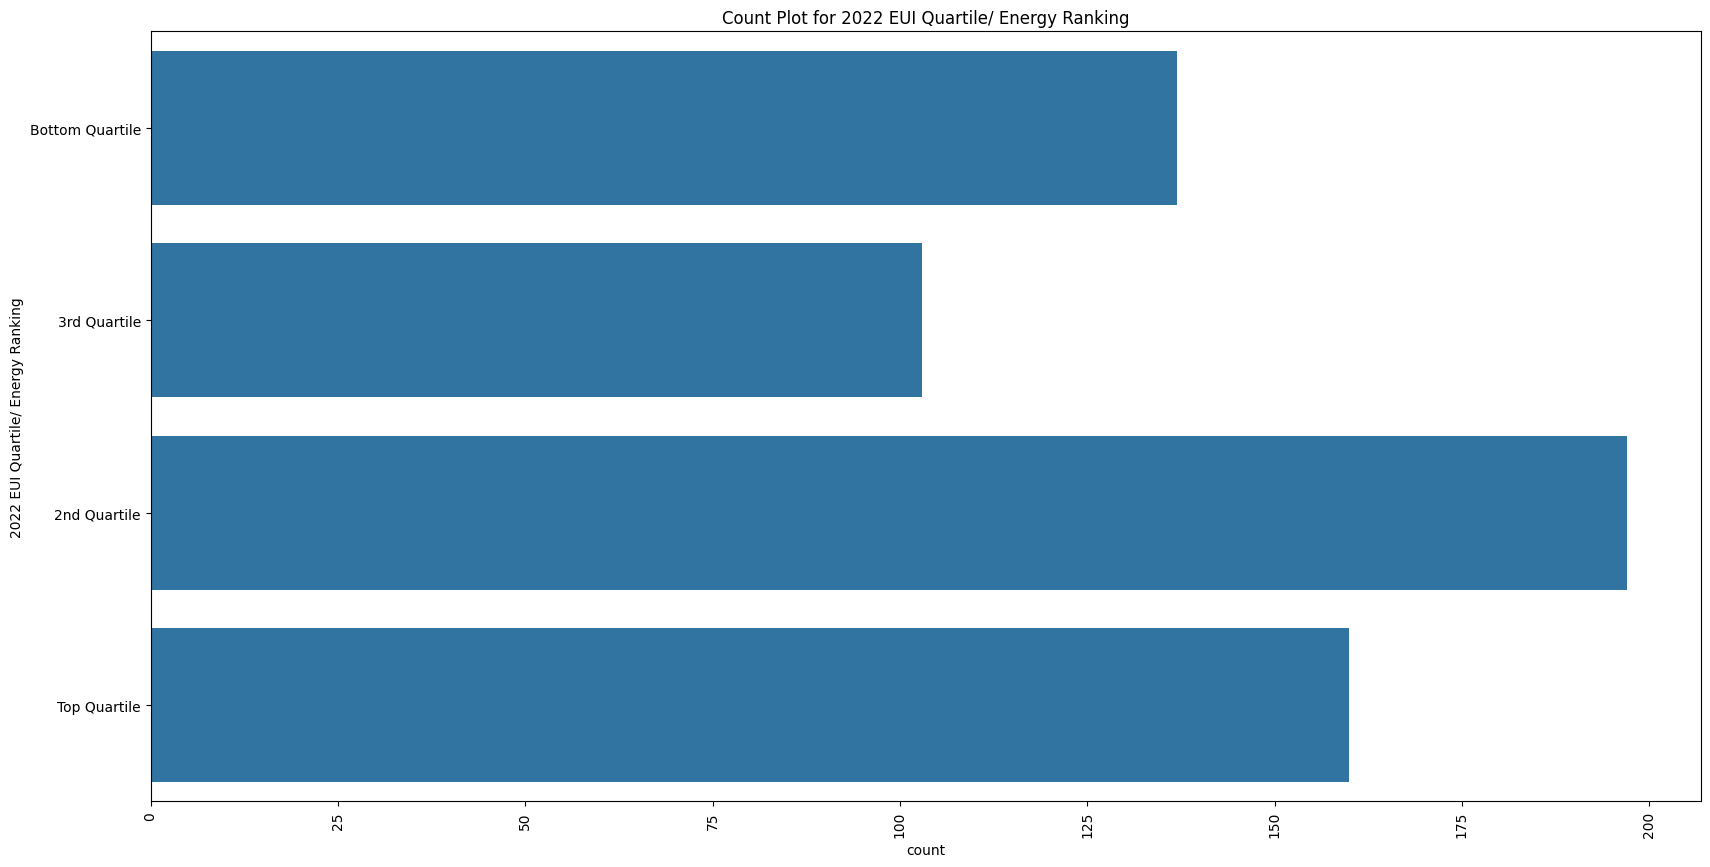

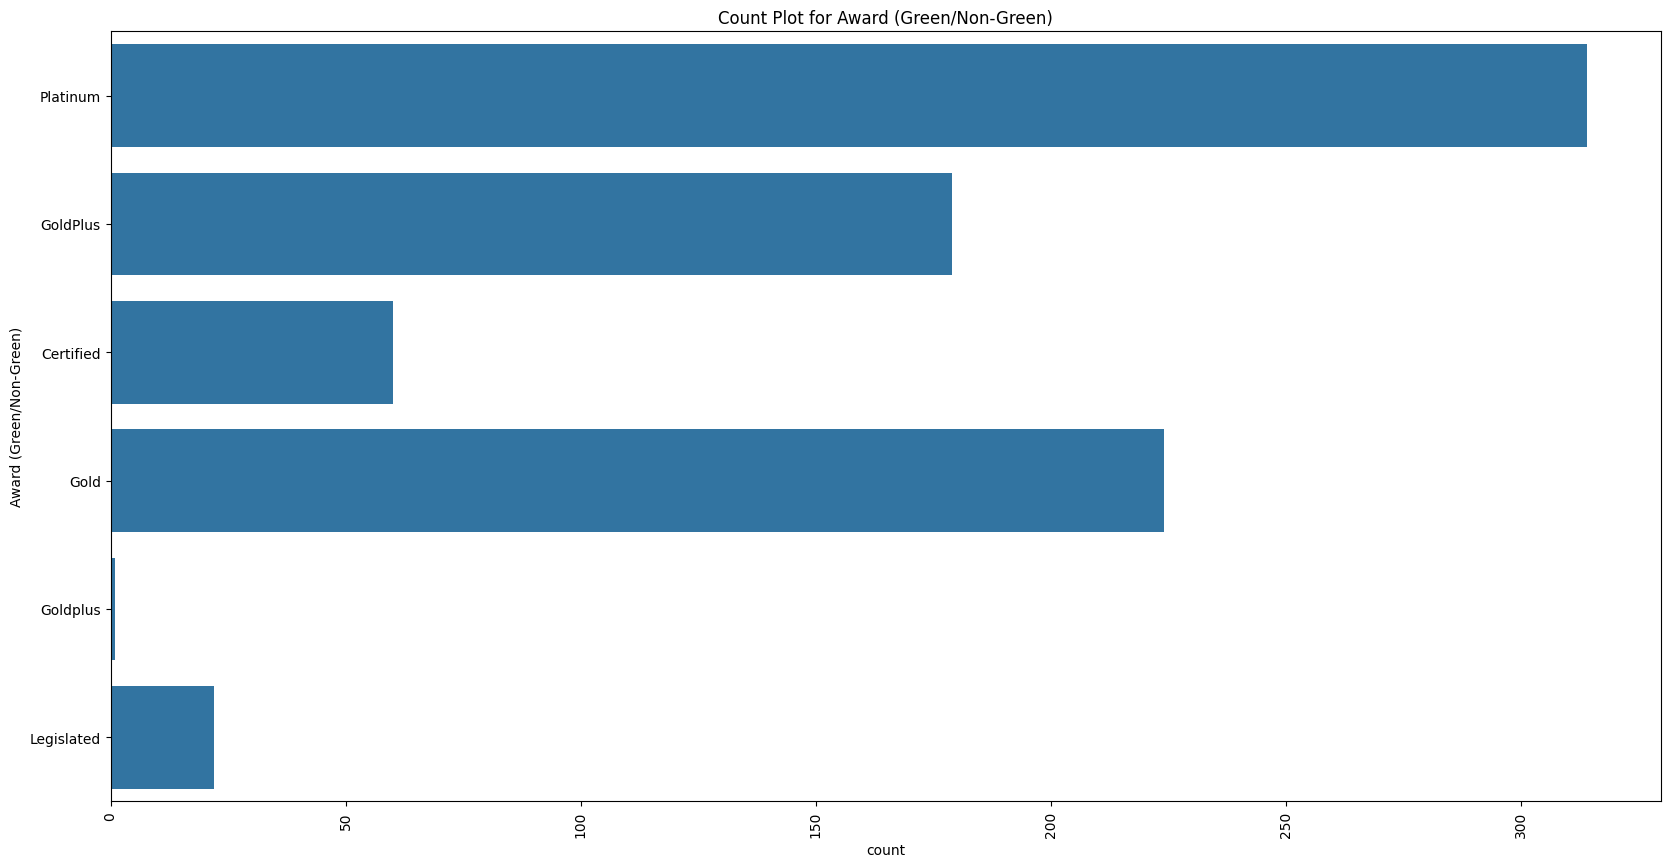

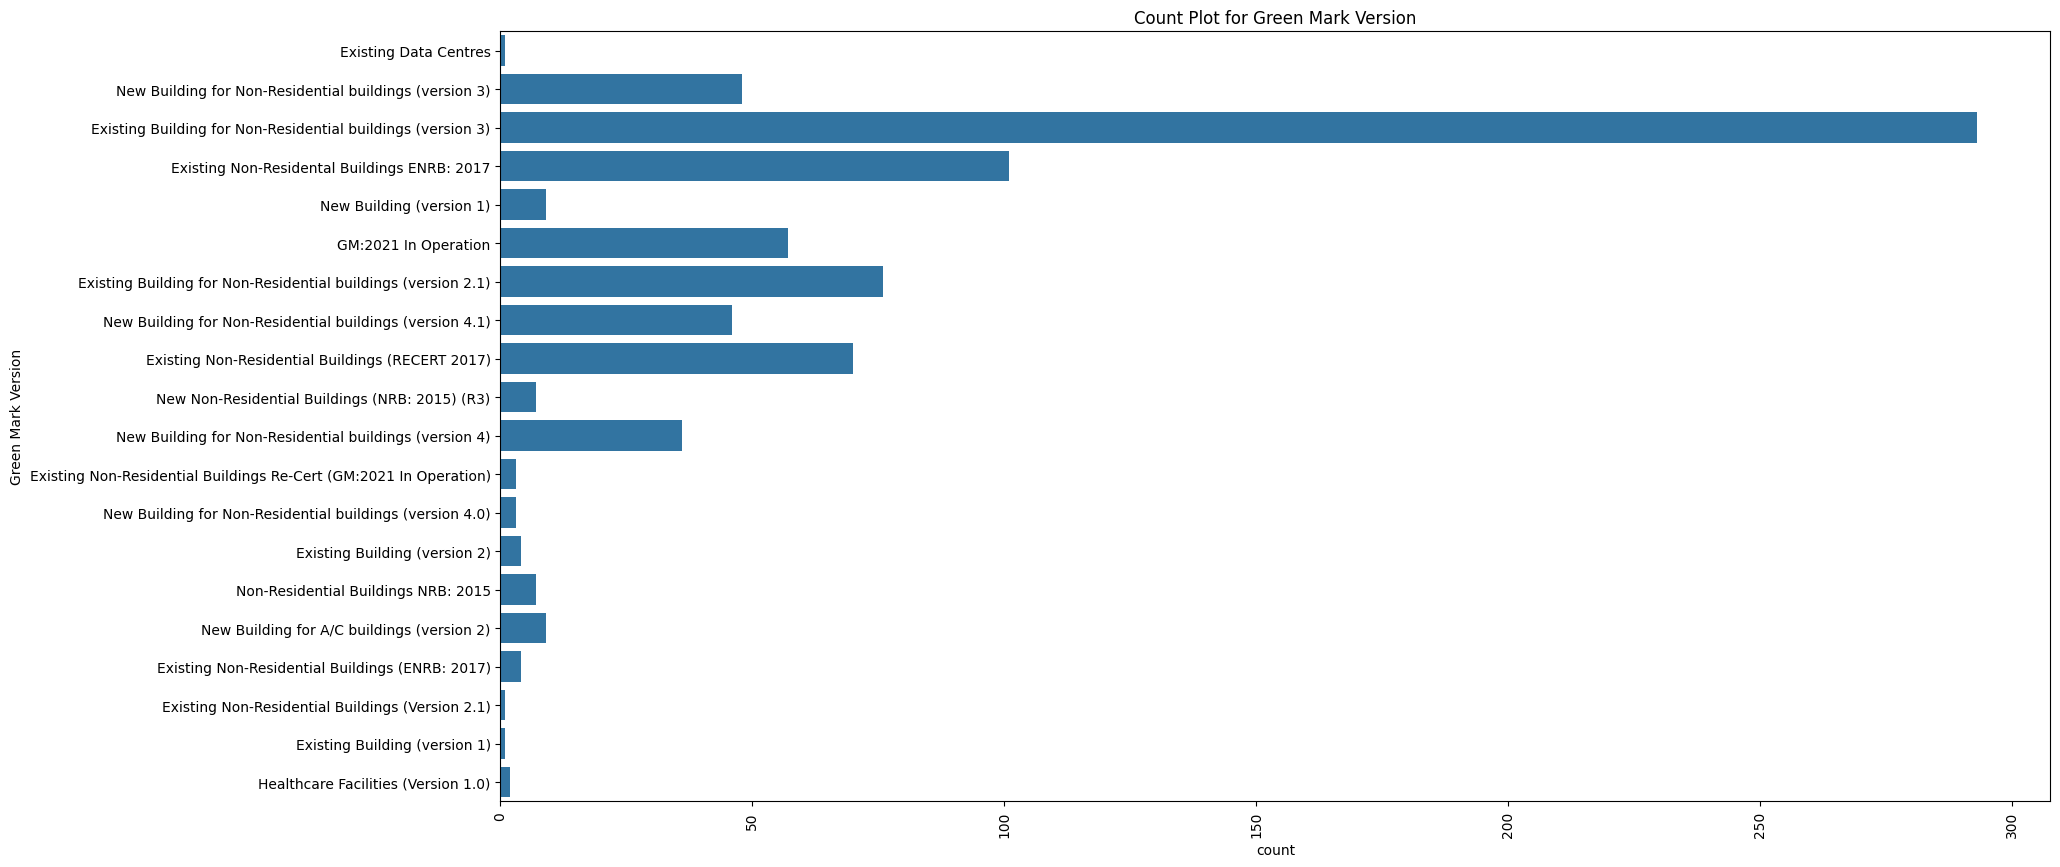

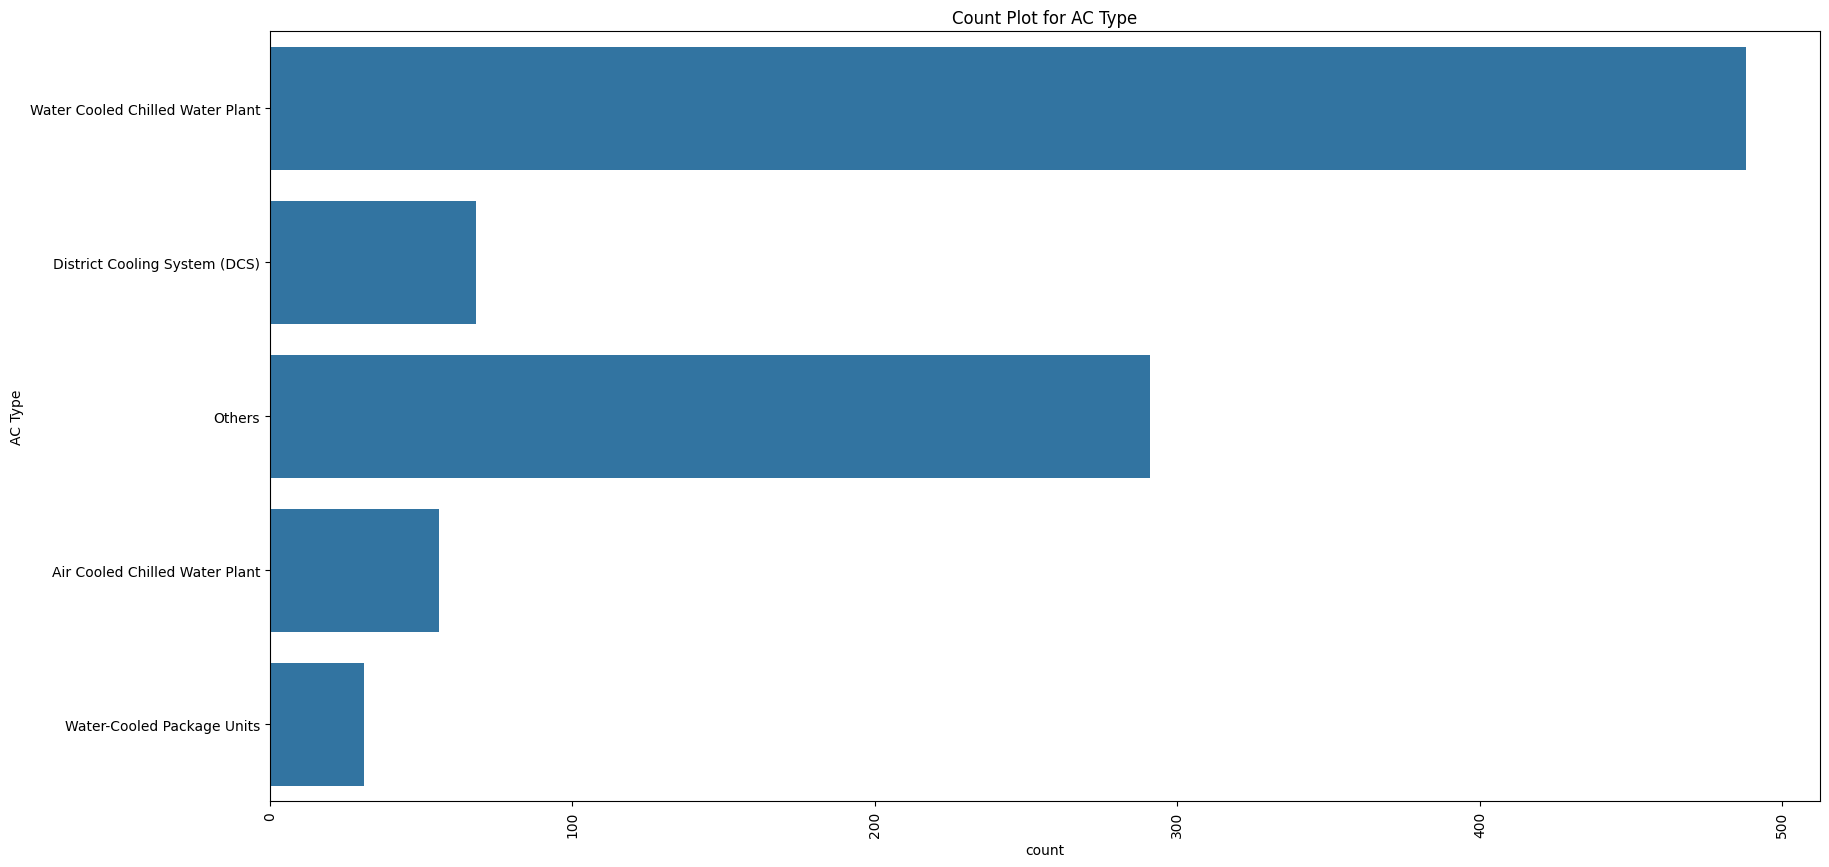

In [81]:
for col in cat:
    plt.figure(figsize=(20, 10))
    sns.countplot(y=df[col])
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation = 90)
    plt.show()

In [82]:
#Define function to make bivariate graphs
def multiple_category_count_plot(dataframe,first_dimension,horizontal_label,second_dimension):

    plt.figure(figsize=(20,10))
    sns.barplot(x=horizontal_label,
                y=first_dimension,
                hue=second_dimension,
                data=df.groupby([first_dimension, 
                second_dimension]).size().to_frame(horizontal_label).reset_index())
    plt.title(f"{first_dimension} - {second_dimension}")
    plt.show()

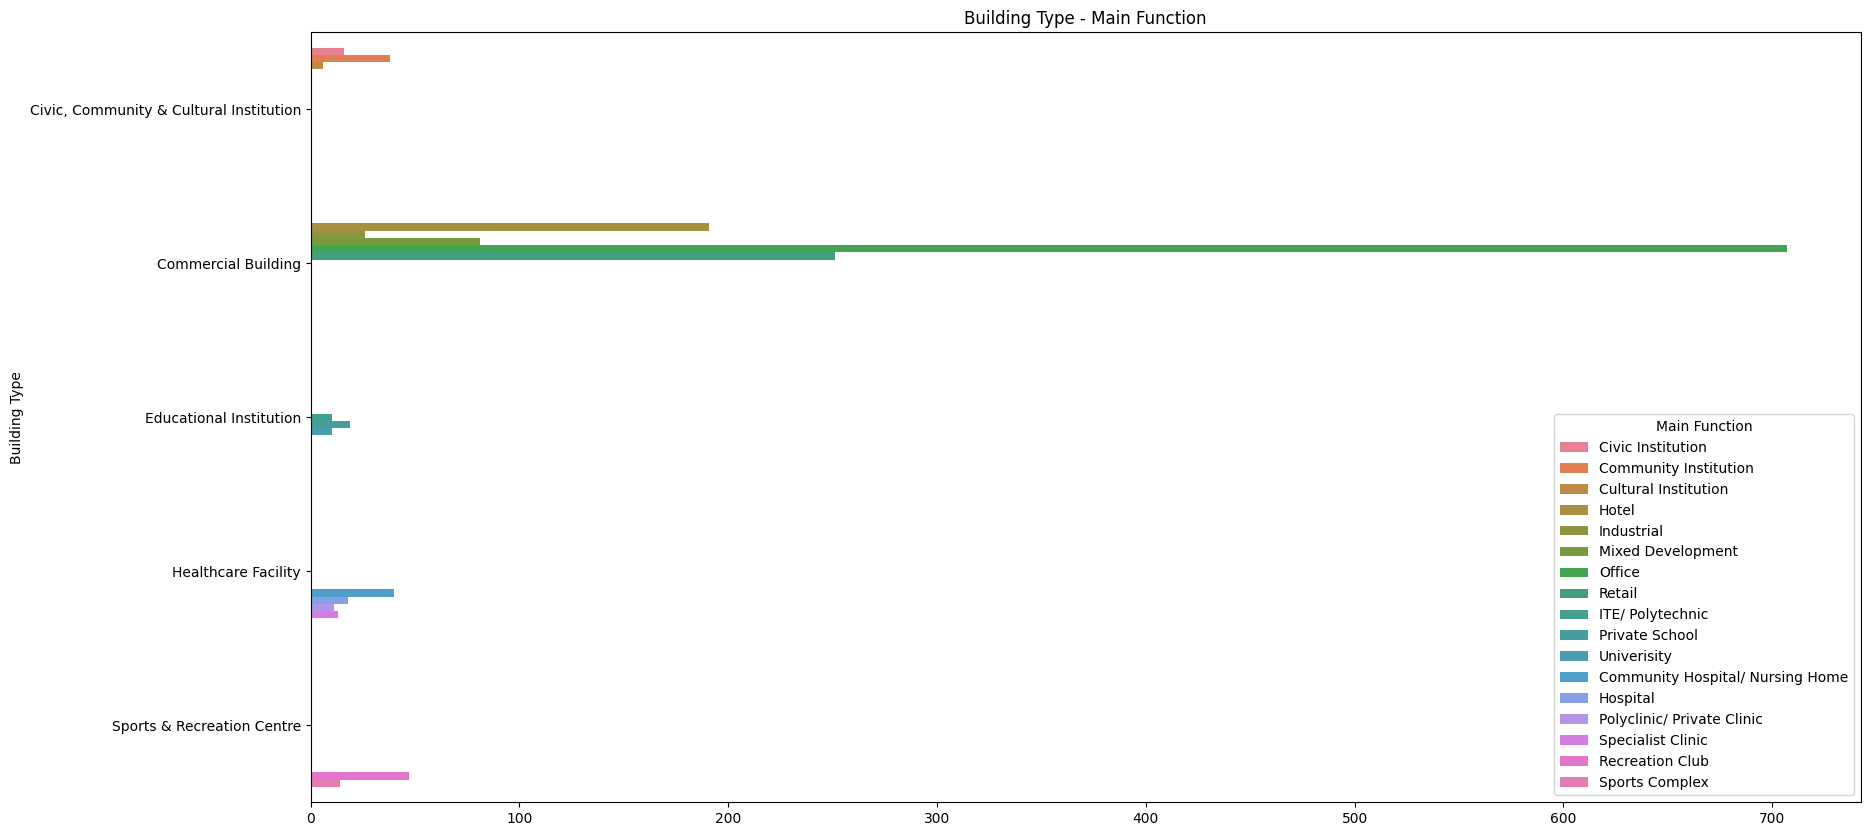

In [83]:
multiple_category_count_plot(df,'Building Type',"",'Main Function')

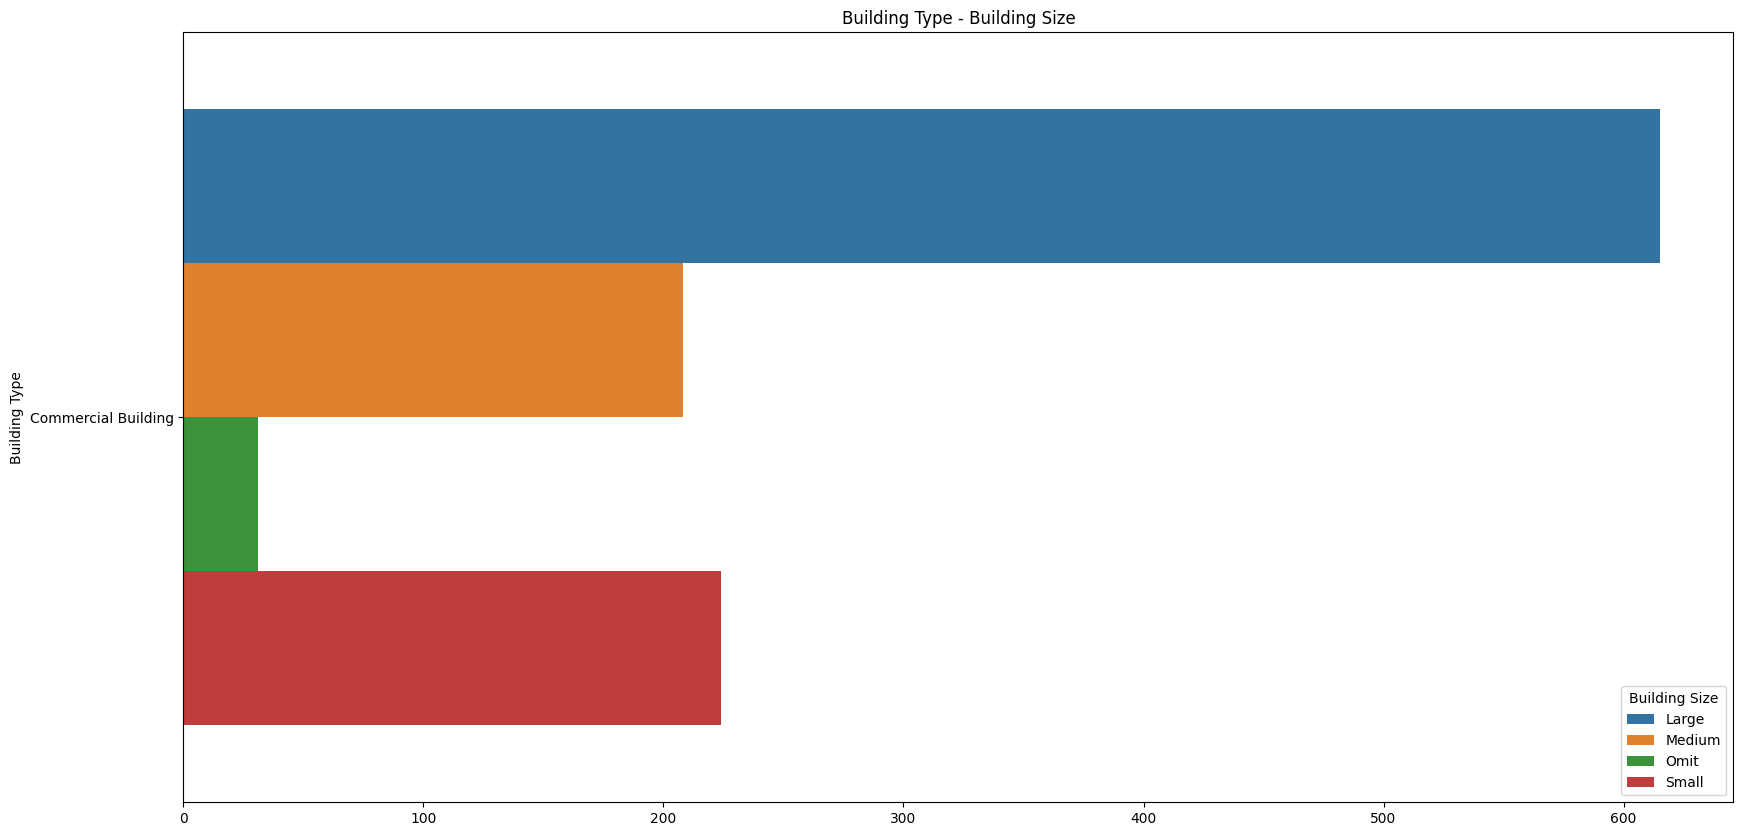

In [84]:
multiple_category_count_plot(df,'Building Type',"",'Building Size')

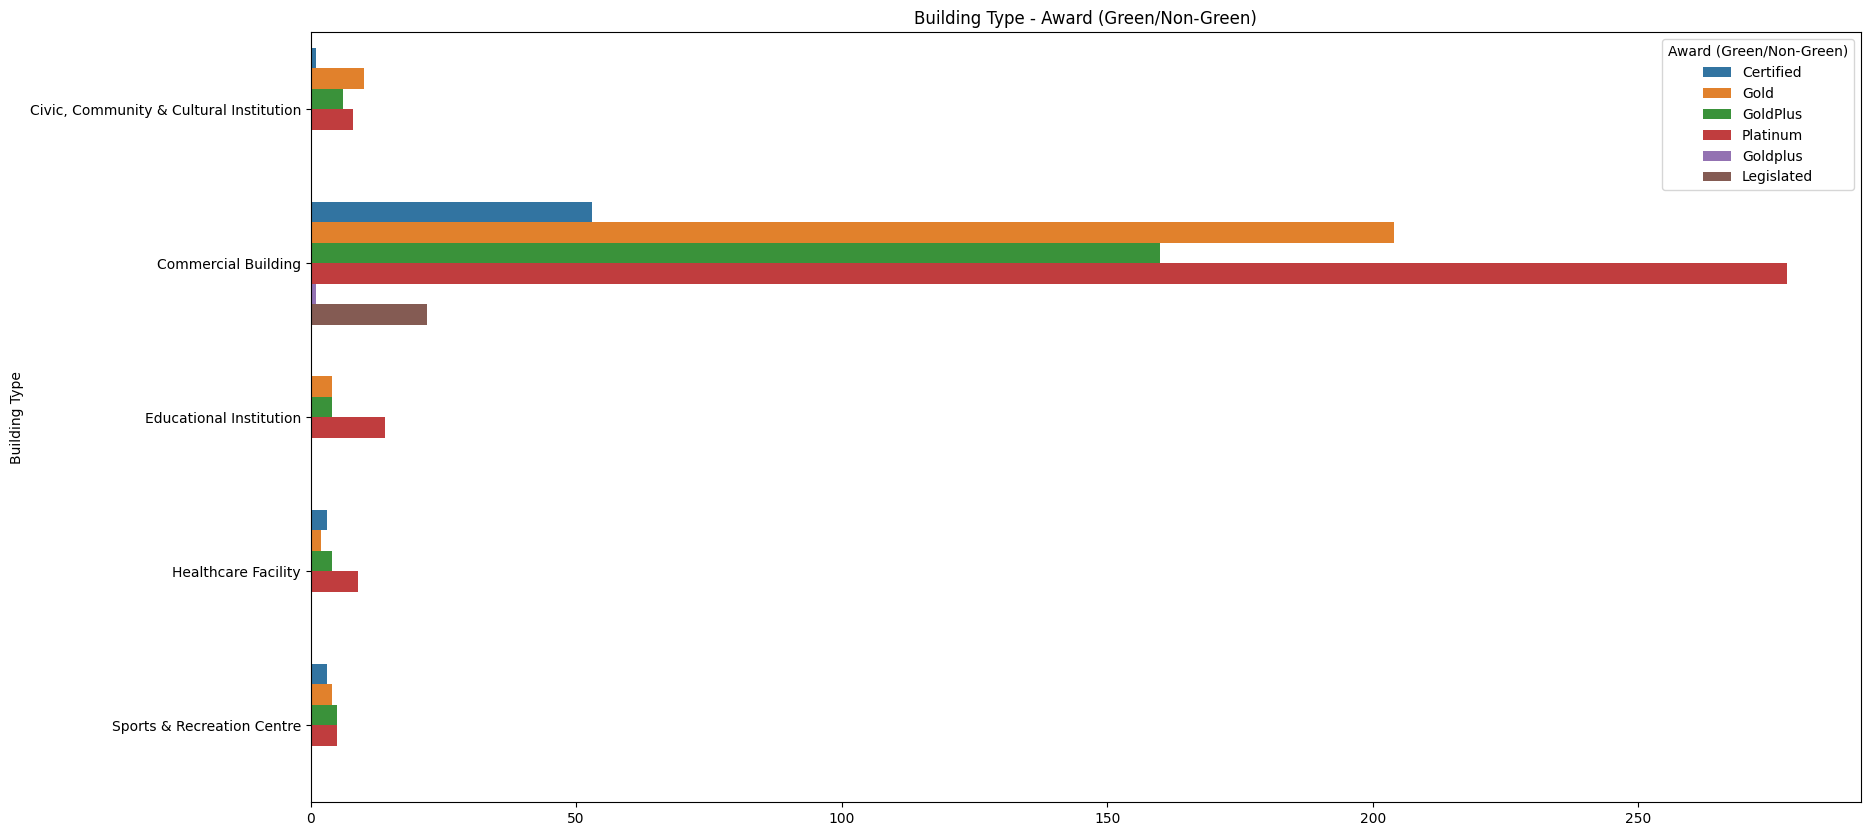

In [85]:
multiple_category_count_plot(df,'Building Type',"",'Award (Green/Non-Green)')

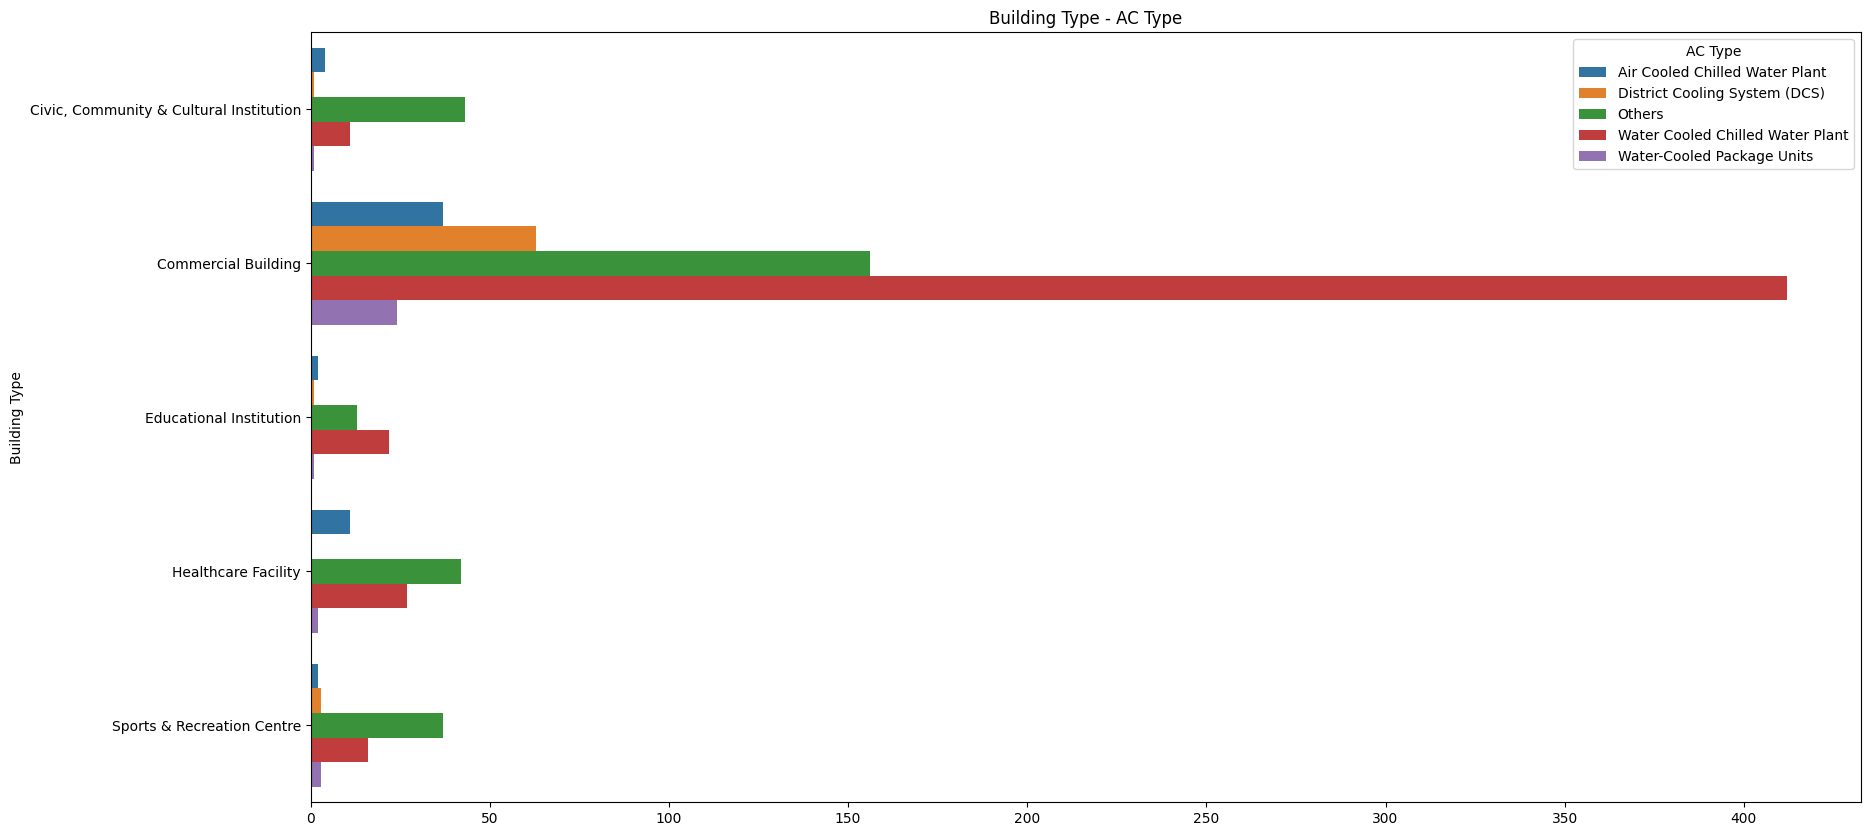

In [86]:
multiple_category_count_plot(df,'Building Type',"",'AC Type')

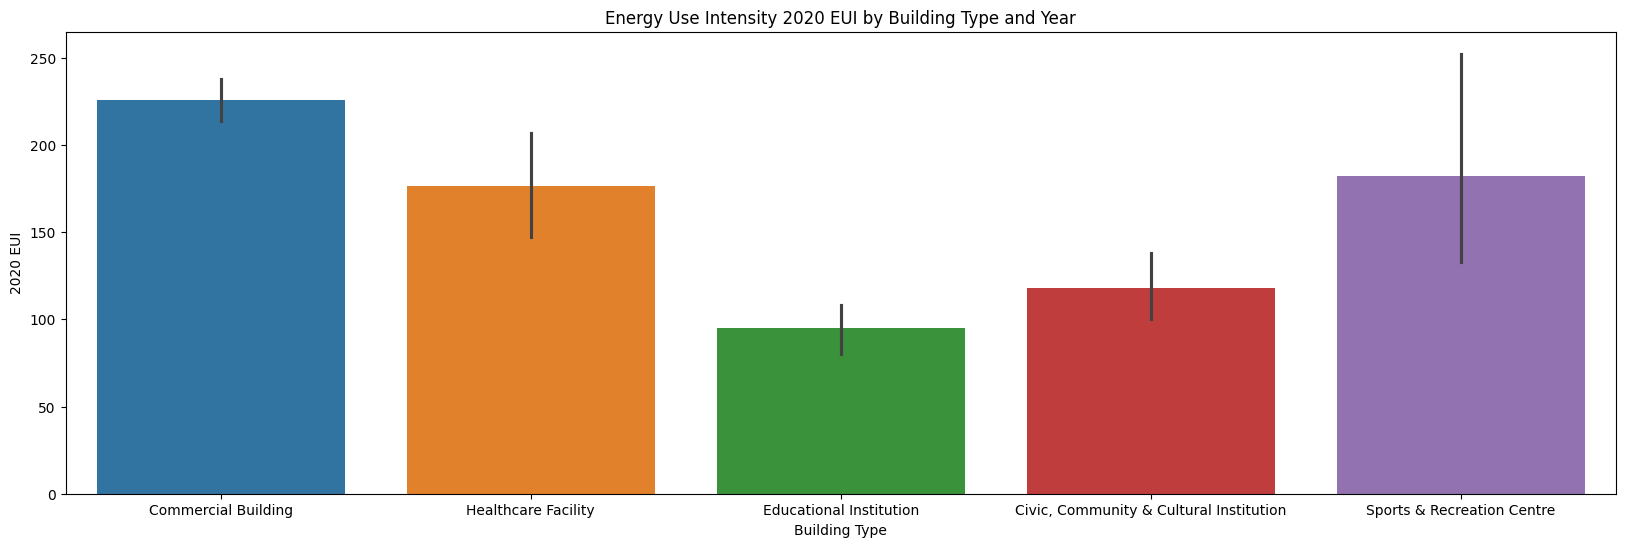

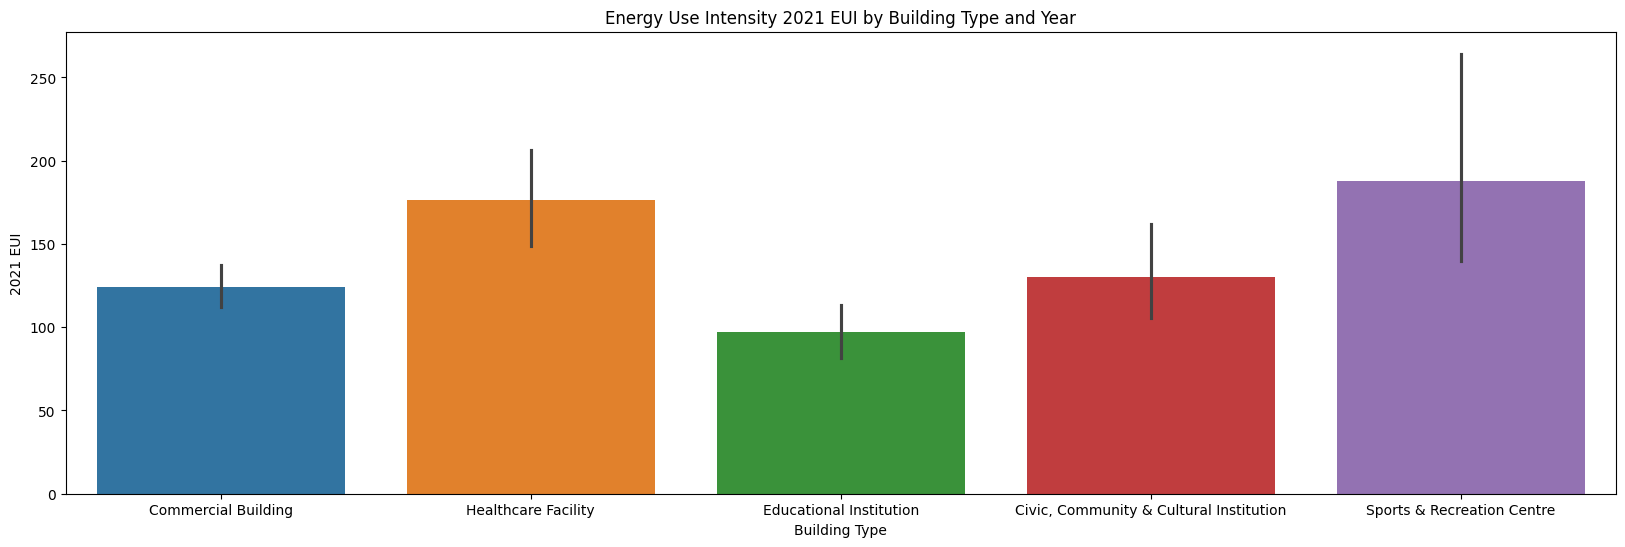

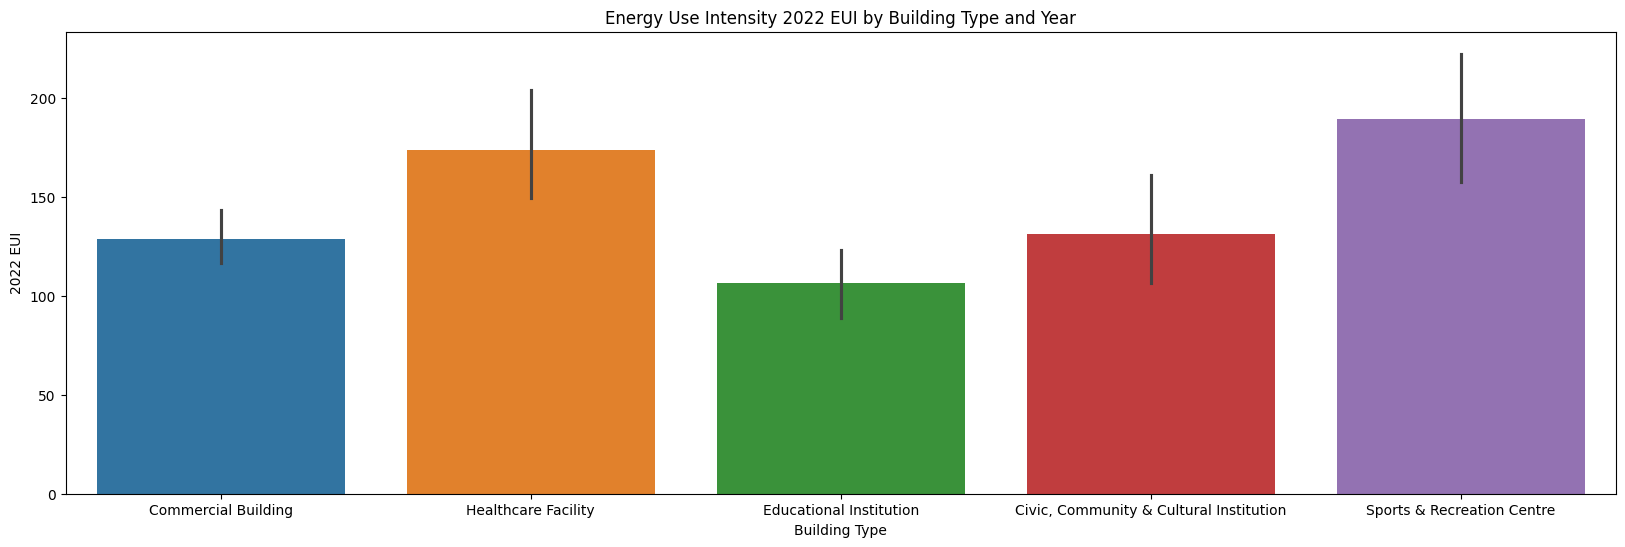

In [87]:
# Set the size of the plot
plt.figure(figsize=(20, 6))
# Create the bar plot
sns.barplot(data=df, x='Building Type', y='2020 EUI', hue='Building Type')
# Set the title of the plot
plt.title('Energy Use Intensity 2020 EUI by Building Type and Year')
# Show the plot
plt.show()
plt.figure(figsize=(20, 6))
# Create the bar plot
sns.barplot(data=df, x='Building Type', y='2021 EUI', hue='Building Type')
# Set the title of the plot
plt.title('Energy Use Intensity 2021 EUI by Building Type and Year')
# Show the plot
plt.show()
plt.figure(figsize=(20, 6))
# Create the bar plot
sns.barplot(data=df, x='Building Type', y='2022 EUI', hue='Building Type')
# Set the title of the plot
plt.title('Energy Use Intensity 2022 EUI by Building Type and Year')
# Show the plot
plt.show()

<Figure size 2000x600 with 0 Axes>

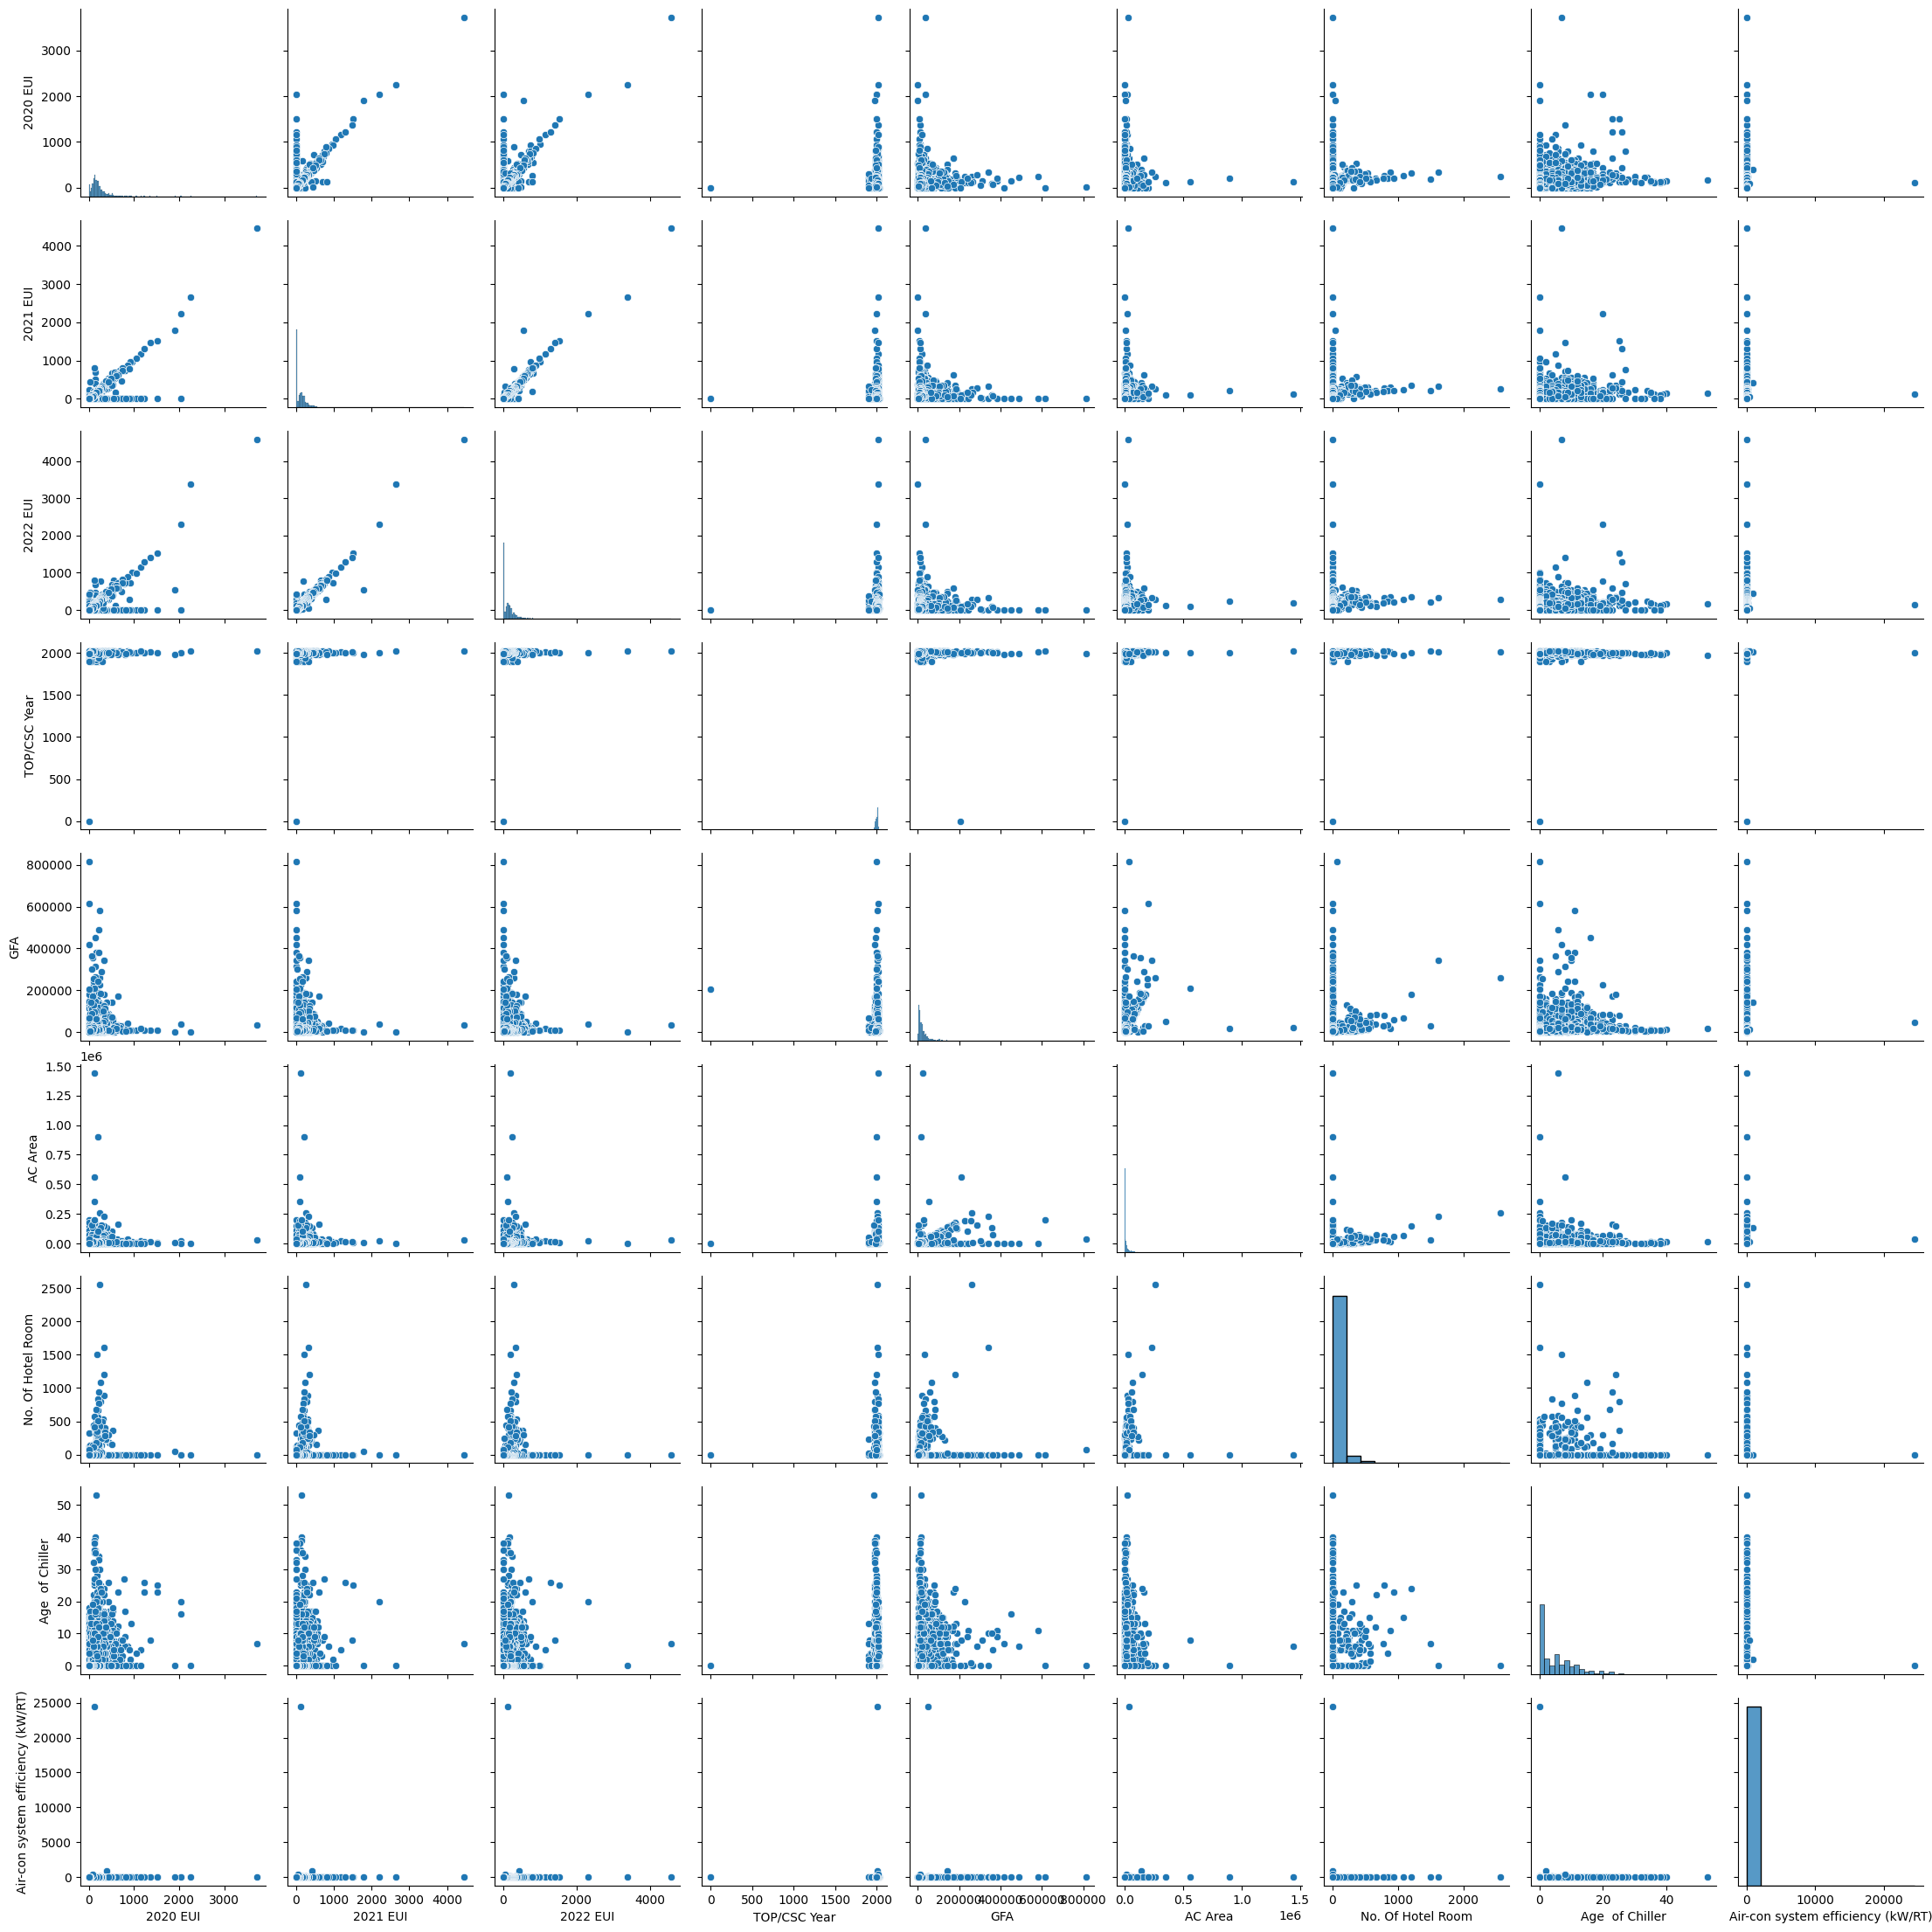

In [88]:
plt.figure(figsize=(20,6))
sns.pairplot(data=df)
plt.show()

In [89]:
# Label Encoding for specific columns
le = LabelEncoder()
df['2020 EUI Quartile/ Energy Ranking'] = le.fit_transform(df['2020 EUI Quartile/ Energy Ranking'])
df['2021 EUI Quartile/ Energy Ranking'] = le.fit_transform(df['2021 EUI Quartile/ Energy Ranking'])
df['2022 EUI Quartile/ Energy Ranking'] = le.fit_transform(df['2022 EUI Quartile/ Energy Ranking'])
df['Award (Green/Non-Green)'] = le.fit_transform(df['Award (Green/Non-Green)'])

In [90]:
# Target Encoding for high-cardinality features

def target_encode(df, target_column, columns_to_encode):
    encoder = TargetEncoder(cols=columns_to_encode)
    df_encoded = df.copy()
    df_encoded[columns_to_encode] = encoder.fit_transform(df[columns_to_encode], df[target_column])
    return df_encoded

# Columns to encode
columns_to_encode = ['Green Mark Version', 'AC Type']
target_column = '2022 EUI'

# Apply target encoding
df_encoded = target_encode(df, target_column, columns_to_encode)

In [91]:
# One-Hot Encoding for other categorical features
df_encoded = pd.get_dummies(df_encoded, columns=['Building Type', 'Main Function', 'Building Size'], dtype=int)

                                              feature    importance
2                                            2021 EUI  7.707634e-01
0                                            2020 EUI  1.386319e-01
7                                  Green Mark Version  2.629167e-02
4                   2022 EUI Quartile/ Energy Ranking  1.107278e-02
12                                    Age  of Chiller  1.030962e-02
5                                        TOP/CSC Year  9.824410e-03
9                                             AC Area  8.482040e-03
8                                                 GFA  6.092567e-03
3                   2021 EUI Quartile/ Energy Ranking  4.316552e-03
13                  Air-con system efficiency (kW/RT)  3.680027e-03
6                             Award (Green/Non-Green)  3.049047e-03
1                   2020 EUI Quartile/ Energy Ranking  2.097364e-03
37                               Building Size_Medium  7.917783e-04
11                                            AC

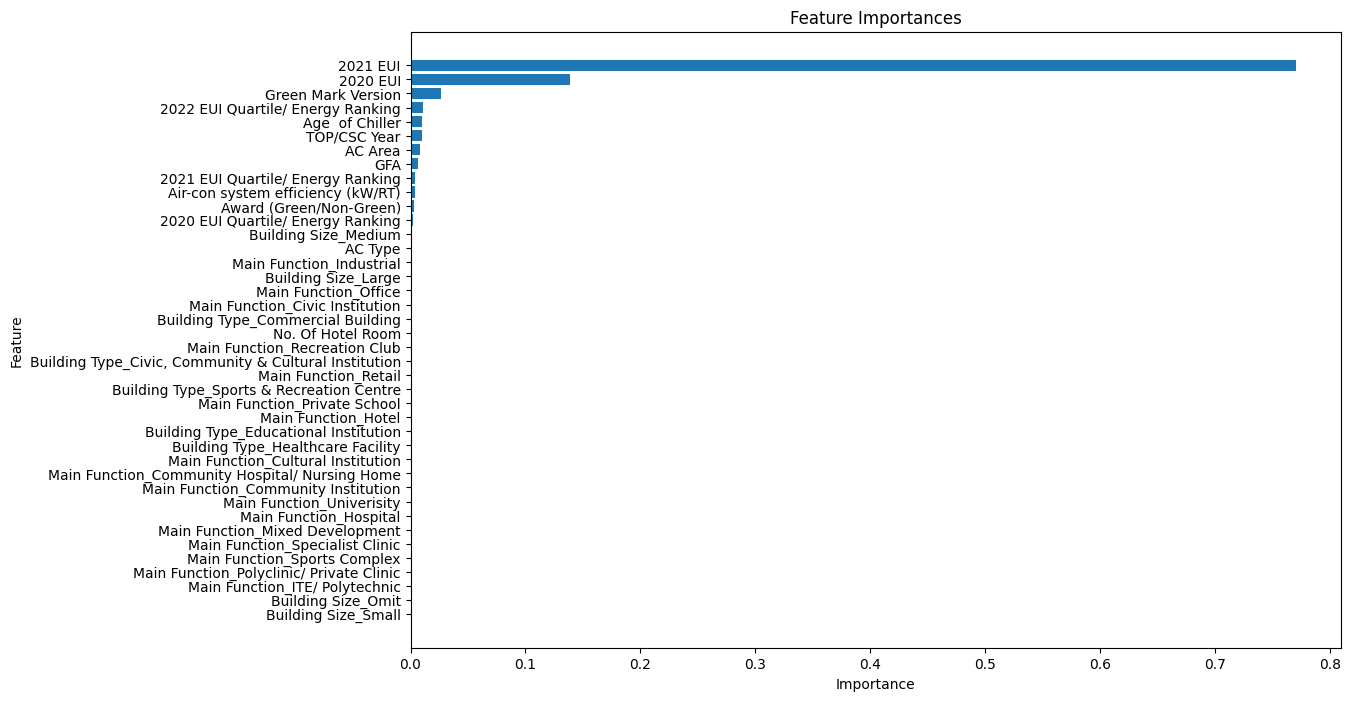

Mean Squared Error (MSE): 4802.16
Mean Absolute Error (MAE): 13.95
R^2 Score: 0.92
      2020 EUI  2020 EUI Quartile/ Energy Ranking  2021 EUI  \
1033    374.96                                  4         0   
1305    123.00                                  4       125   
1435    157.00                                  4       165   
1489     73.00                                  4        91   
788     245.60                                  4         0   

      2021 EUI Quartile/ Energy Ranking  2022 EUI Quartile/ Energy Ranking  \
1033                                  4                                  4   
1305                                  4                                  4   
1435                                  4                                  4   
1489                                  4                                  4   
788                                   4                                  4   

      TOP/CSC Year  Award (Green/Non-Green)  Green Mark Version      

In [92]:
# Preprocess your DataFrame
# For this example, let's assume the target variable is 'target' and it's a classification task
from sklearn.ensemble import RandomForestClassifier
target = '2022 EUI'
features = df_encoded.drop(columns=[target])
labels = df_encoded[target]


# For simplicity, let's assume all features are numerical
# If you have categorical features, you need to encode them as well

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

# (Optional) Display a sample of the predictions
predictions_df = X_test.copy()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_pred

print(predictions_df.head())

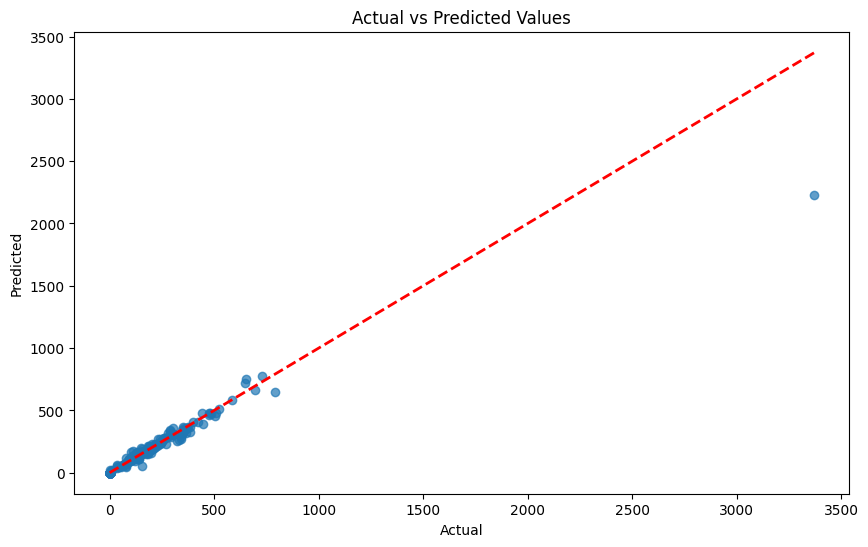

In [93]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

Here we can see, there is outlier in a dataset (we will remove that outlier)

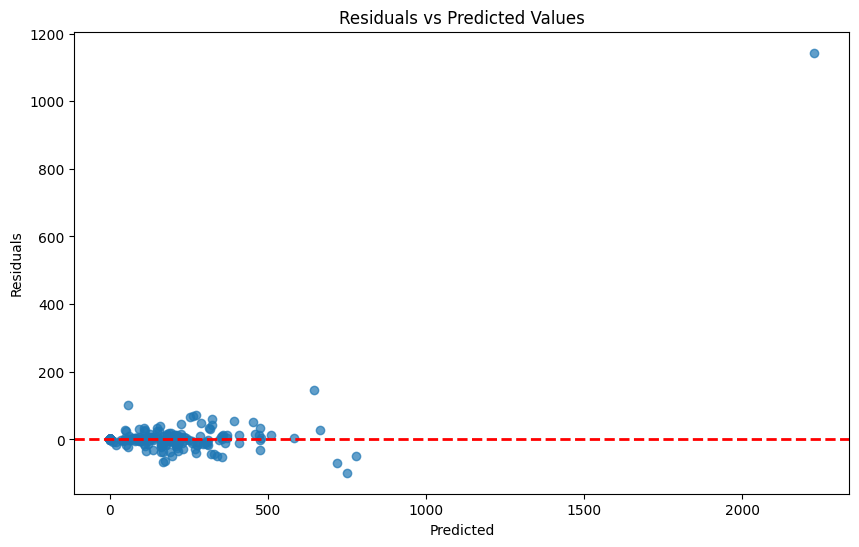

In [94]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()